# Airplane Passenger Satisfaction Analysis
##### Fannia Marvela  

# Latar Belakang
Dalam industri penerbangan yang sangat kompetitif, setiap perusahaan memiliki keinginan untuk membedakan dirinya dari kompetitor demi mendapatkan pelanggan. Untuk maskapai penerbangan, customer experience merupakan salah satu hal paling penting yang menjadi pertimbangan bagi penumpang untuk menggunakan maskapai penerbangan tersebut. Maka, penting bagi sebuah maskapai penerbangan untuk memahami kebutuhan penumpang dan  meningkatkan kepuasaan penumpang terhadap layanan yang diberikan karena kepuasan penumpang memiliki pengaruh yang besar bagi perusahaan secara finansial maupun non-finansial.

Sebuah maskapai penerbangan dari Amerika Serikat ingin melakukan analisa terkait kepuasan penumpang pesawat melalui survei kepuasaan pelanggan untuk mengetahui seberapa baik pelayanan yang diberikan telah memenuhi harapan dari penumpang dan mengetahui faktor-faktor yang mempengaruhi kepuasaan penumpang terkait penerbangan yang dilakukan.

# Pernyataan Masalah
Maskapai penerbangan Amerika Serikat ingin mengetahui tingkat kepuasaan penumpang setelah melakukan penerbangan serta faktor-faktor yang mempengaruhi penumpang yang puas dan penumpang yang tidak puas akan pelayanan maskapai penerbangan. Berdasarkan informasi yang akan didapat, perusahaan dapat mengetahui faktor kepuasaan penumpang yang harus ditingkatkan dan mendapatkan acuan bagi pengembangan  pelayanan penerbangan di masa mendatang untuk meningkatkan loyalitas pelanggan. 

Maka sebagai seorang data analyst, pernyataan masalah yang ingin dijawab: 
1. Apakah penumpang maskapai penerbangan merasa puas atau tidak puas terhadap pelayanan maskapai penerbangan?
2. Apa faktor-faktor yang dapat mempengaruhi kepuasaan penumpang terkait pelayanan maskapai penerbangan?
3. Apa yang dapat dilakukan maskapai penerbangan untuk meningkatan pelayanan yang diberikan?



# Data
Data yang digunakan adalah dataset Airplane Passenger Satisfaction yang berisikan survei tingkat kepuasaan penumpang maskapai penerbangan di Amerika Serikat yang dapat diakses pada: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download



## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Berikut ini adalah 5 data pertama dari dataset Airplane Passenger Satisfaction:

In [3]:
df=pd.read_csv('airline passanger satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Kolom Unnamed: 0 dan ID didrop karena tidak memberikan informasi yang berarti pada dataset dan tidak akan digunakan untuk proses analisis selanjutnya.

In [4]:
df=df.drop(columns=['Unnamed: 0','id'])
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# 1. Data Understanding

Dataset berisikan informasi dan riwayat penerbangan penumpang serta hasil survei penumpang terkait kepuasaan penumpang terhadap pelayanan maskapai penerbangan. Terdapat 23 kolom pada dataset Airline Passenger Satisfaction yaitu:

Data Penumpang dan Riwayat Penerbangan Penumpang
* Gender: Jenis kelamin penumpang (Female,Male)
* Customer Type: Tipe konsumen (Loyal Customer, Disloyal Customer)
* Age: Usia penumpang
* Type of Travel: Tipe penerbangan penumpang (Personal Travel, Business Travel)
* Class: Travel class penumpang (Business, Eco, Eco Plus)
* Flight Distance: Jarak penerbangan

Rating Kepuasan Penumpang Terhadap Layanan Maskapai Penerbangan
* Inflight Wifi Service: Tingkat kepuasan terkait layanan inflight wifi
* Departure/Arrival Time Convenient: Tingkat kepuasan terkait waktu keberangkatan atau kedatangan
* Ease of Online Booking: Tingkat kepuasan terkait kemudahan online booking
* Gate Location: Tingkat kepuasan terkait lokasi gate
* Food and Drink: Tingkat kepuasan terkait makanan dan minuman
* Online Boarding: Tingkat kepuasan terkait online boarding
* Seat Comfort: Tingkat kepuasan terkait kenyamanan kursi
* Inflight Entertainment: Tingkat kepuasan terkait hiburan dalam pesawat
* On-board Service: Tingkat kepuasan terkait terkait layanan on-board
* Leg Room Service: Tingkat kepuasan terkait ruang kaki
* Baggage Handling: Tingkat kepuasan terkait penanganan bagasi penumpang
* Check-in Service: Tingkat kepuasan terkait layanan check-in
* Inflight Service: Tingkat kepuasan terkait layanan inflight
* Cleanliness: Tingkat kepuasan terkait kebersihan
* Departure Delay in Minutes: Waktu delay pada saat keberangkatan dalam menit
* Arrival Delay in Minutes: Waktu delay pada saat kedatangan dalam menit
* Satisfaction: Tingkat kepuasaan maskapai penerbangan (Satisfaction, Neutral or Dissatisfaction)






In [287]:
df.shape

(103904, 23)

In [6]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [180]:
pd.set_option('display.max_colwidth', -1)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabeldesc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabeldesc

/var/folders/ny/nxn0tz_1411g17fqq_rltz200000gn/T/ipykernel_22281/2358055457.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Column Name,Number of Unique,Unique Sample
0,Gender,2,"[Male, Female]"
1,Customer Type,2,"[Loyal Customer, disloyal Customer]"
2,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
3,Type of Travel,2,"[Personal Travel, Business travel]"
4,Class,3,"[Eco Plus, Business, Eco]"
5,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
6,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
7,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
8,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"
9,Gate location,6,"[1, 3, 2, 5, 4, 0]"


Secara umum, dapat dilihat bahwa: 
* Terdapat 103.904 data dan 23 feature pada dataset.
* Terdapat data kosong pada kolom Arrival Delay in Minutes yang diwakili dengan data nan.
* Tidak terdapat anomali pada dataset karena berdasarkan domain knowledge, data pada dataset masih masuk akal.


# 2. Data Cleaning
Sebelum menganalisa data, kita perlu melakukan data cleaning untuk mengatasi kesalahan pada data dan inkonsistensi yang mungkin muncul sehingga data yang sudah dibersihkan menjadi data berkualitas dapat digunakan pada proses analisa nantinya.

## 2.1 Data Formatting

In [8]:
df.loc[df['Customer Type']=='disloyal Customer','Customer Type']='Disloyal Customer'
df.loc[df['Type of Travel']=='Business travel','Type of Travel']='Business Travel'
df.loc[df['satisfaction']=='neutral or dissatisfied','satisfaction']='Neutral or Dissatisfied'
df.loc[df['satisfaction']=='satisfied','satisfaction']='Satisfied'


Kita melakukan penggantian format penulisan yaitu:
* Disloyal customer pada kolom Customer Type menjadi Disloyal Customer 
* Business travel pada kolom Type of Travel menjadi Business Travel 
* neutral or dissatisfied pada kolom satisfaction menjadi Neutral or Dissatisfied
* satisfied pada kolom satisfaction menjadi Satisfied  
Penggantian format penulisan dilakukan untuk menyamakan format penulisan dengan kolom yang lainnya dan menghindari kekeliruan penulisan.

## 2.2 Check Duplicate

In [9]:
df.duplicated().sum()

0

Tidak terdapat data duplikat pada dataset sehingga tidak perlu ada data yang didrop.

## 2.3 Handling 0 Value in Survey Data

In [291]:
print(f'''
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Wifi Service: {len(df[df['Inflight wifi service'] == 0])/df['Inflight wifi service'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Departure/Arrival Time Convenient: {len(df[df['Departure/Arrival time convenient'] == 0])/df['Departure/Arrival time convenient'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Ease of Online Booking: {len(df[df['Ease of Online booking'] == 0])/df['Ease of Online booking'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Gate Location: {len(df[df['Gate location'] == 0])/df['Gate location'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Food and Drink: {len(df[df['Food and drink'] == 0])/df['Food and drink'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Online Boarding: {len(df[df['Online boarding'] == 0])/df['Online boarding'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Seat Comfort: {len(df[df['Seat comfort'] == 0])/df['Seat comfort'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Entertainment: {len(df[df['Inflight entertainment'] == 0])/df['Inflight entertainment'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom On-board Service: {len(df[df['On-board service'] == 0])/df['On-board service'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Leg Room Service: {len(df[df['Leg room service'] == 0])/df['Leg room service'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Baggage Handling: {len(df[df['Baggage handling'] == 0])/df['Baggage handling'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Checkin service: {len(df[df['Checkin service'] == 0])/df['Checkin service'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight service: {len(df[df['Inflight service'] == 0])/df['Inflight service'].value_counts().sum()*100}
Persentase hasil survei yang memiliki nilai 0 pada kolom Cleanliness: {len(df[df['Cleanliness'] == 0])/df['Cleanliness'].value_counts().sum()*100}

''')


Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Wifi Service: 2.9864105327995074
Persentase hasil survei yang memiliki nilai 0 pada kolom Departure/Arrival Time Convenient: 5.100862334462581
Persentase hasil survei yang memiliki nilai 0 pada kolom Ease of Online Booking: 4.318409300893132
Persentase hasil survei yang memiliki nilai 0 pada kolom Gate Location: 0.0009624268555589776
Persentase hasil survei yang memiliki nilai 0 pada kolom Food and Drink: 0.1029796735448106
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Online Boarding: 2.3367724052971974
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Seat Comfort: 0.0009624268555589776
Persentase hasil survei yang memiliki nilai 0 pada kolom Inflight Entertainment: 0.013473975977825684
Persentase hasil survei yang memiliki nilai 0 pada kolom On-board Service: 0.0028872805666769327
Persentase hasil survei yang memiliki nilai 0 pada kolom Leg Room Service: 0.4542654758238374
Persenta

Hasil survei yang bernilai 0 dapat mempengaruhi proses analisa data karena tidak memberikan informasi apapun terkait kepuasaan pelanggan terhadap pelayanan maskapai penerbangan. Namun, dapat dilihat bahwa persentase hasil survei yang memiliki nilai 0 pada setiap kolom rating kepuasan penumpang terhadap pelayanan maskapai penerbangan memiliki persentase yang dapat dikatakan kecil karena persentase hasil survei yang memiliki nilai 0 terbesar yaitu yang terdapat pada kolom Departure/Arrival Time Convenient hanya memiliki persentase sebesar 5,1% sedangkan persentase hasil survei yang memiliki nilai 0 pada kolom lainnya memiliki nilai dibawah itu.

Maka, hasil survei yang memiliki nilai 0 pada semua kolom hasil rating kepuasan penumpang terhadap pelayanan maskapai penerbangan tidak akan didrop.

## 2.4 Handling Missing Value

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

Masing-masing tipe data sudah sesuai dengan masing-masing feature. Terdapat 23 feature pada dataset dimana:
* 5 feature merupakan data nominal yaitu Gender, Customer Type, Type of Travel, Class, dan Satisfaction
* 4 feature merupakan data continuous yaitu Age, Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes
* 14 feature merupakan data ordinal berupa hasil survei kepuasan penumpang terhadap pelayanan maskapai penerbangan dengan skala 1-5 (1: Sangat Tidak Puas, 5: Sangat Puas) yaitu Inflight Wifi Service, Departure/Arrival Time Convenient, Ease of Online Booking, Gate Location, Food and Drink, Online Boarding, Seat Comfort, Inflight Entertainment, On-board Service, Leg Room Service, Baggage Handling, Check-in Service, Inflight Service, Cleanliness




In [184]:
# Jumlah data yang kosong
df.isna().sum()

Gender                               0  
Customer Type                        0  
Age                                  0  
Type of Travel                       0  
Class                                0  
Flight Distance                      0  
Inflight wifi service                0  
Departure/Arrival time convenient    0  
Ease of Online booking               0  
Gate location                        0  
Food and drink                       0  
Online boarding                      0  
Seat comfort                         0  
Inflight entertainment               0  
On-board service                     0  
Leg room service                     0  
Baggage handling                     0  
Checkin service                      0  
Inflight service                     0  
Cleanliness                          0  
Departure Delay in Minutes           0  
Arrival Delay in Minutes             310
satisfaction                         0  
dtype: int64

In [28]:
# Persentase data yang kosong
df.isna().sum()/len(df)*100

id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes        

<AxesSubplot:>

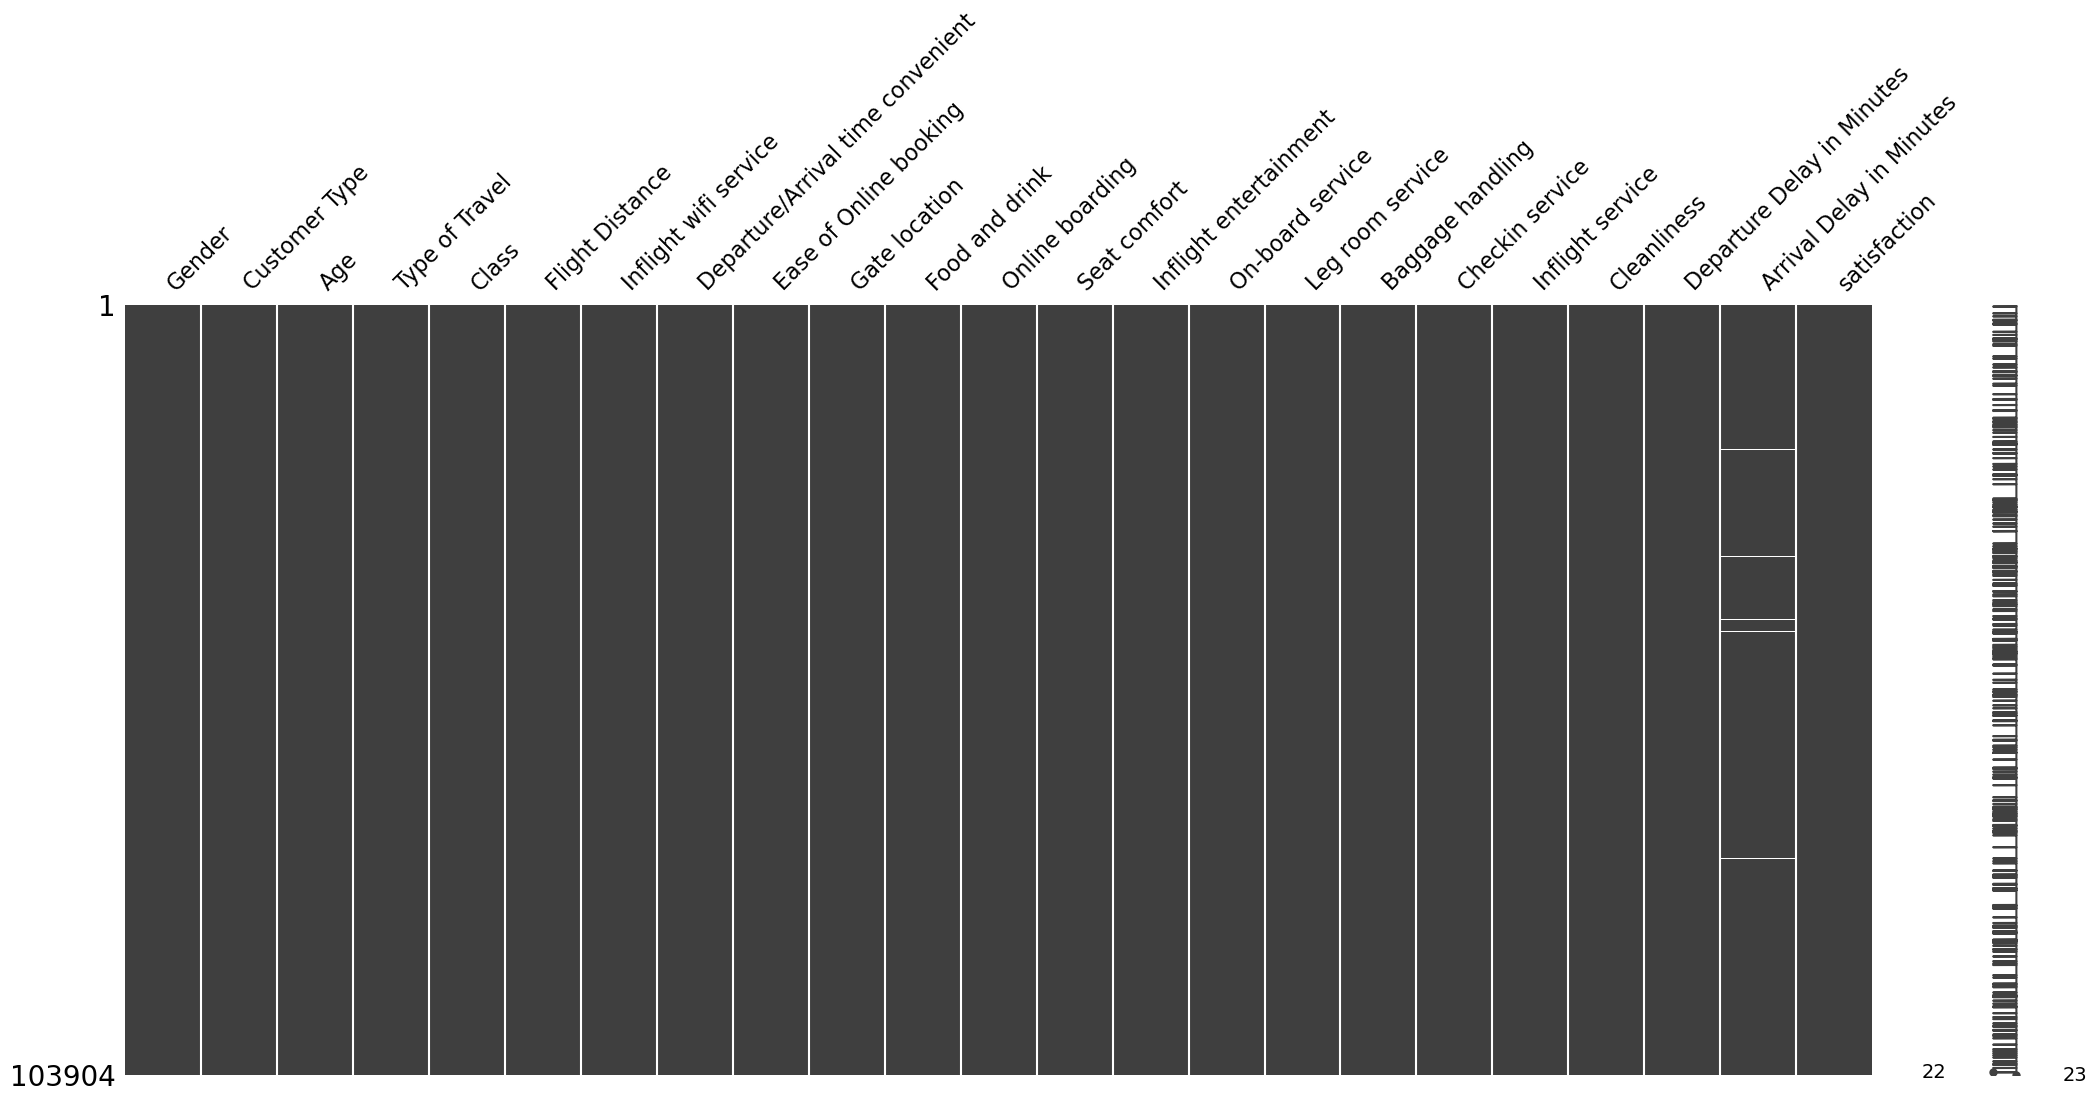

In [90]:
# Visualisasi data yang kosong
msno.matrix(df)

Terdapat 310 data kosong pada kolom Arrival Delay in Minutes dengan persentase sebesar 0,3% dan berdasarkan visualisasi sebaran data kosong tidak terlihat terdapat pola atau sebaran data kosong yang berkaitan dengan feature lainnya.

Maka, untuk menangani data yang kosong akan dilakukan analisa lebih lanjut untuk menentukan penanganan yang tepat terhadap data kosong (menghapus baris/kolom yang berisi data yang kosong atau mengisi data yang kosong dengan nilai yang sedekat mungkin dengan nilai asli).

In [10]:
# Data yang memiliki missing value pada kolom Arrival Delay in Minutes
arrivaldelay_nan=df.loc[df['Arrival Delay in Minutes'].isna()==True] 
arrivaldelay_nan

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,Female,Loyal Customer,38,Business Travel,Eco,109,5,3,3,3,...,5,5,2,4,1,1,5,31,NaN,Satisfied
1124,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,...,4,4,4,4,3,3,4,38,NaN,Neutral or Dissatisfied
1529,Male,Loyal Customer,39,Business Travel,Business,733,2,5,5,5,...,2,2,2,2,2,2,3,11,NaN,Neutral or Dissatisfied
2004,Female,Disloyal Customer,26,Business Travel,Business,1035,3,3,3,1,...,2,3,3,4,5,5,2,41,NaN,Neutral or Dissatisfied
2108,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,...,5,1,4,2,1,2,5,1,NaN,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102067,Male,Loyal Customer,49,Personal Travel,Eco Plus,1249,2,5,2,3,...,3,4,5,4,3,4,3,230,NaN,Neutral or Dissatisfied
102384,Male,Loyal Customer,58,Business Travel,Eco,733,3,3,3,3,...,3,3,1,2,4,2,3,55,NaN,Neutral or Dissatisfied
102552,Female,Disloyal Customer,29,Business Travel,Eco,1107,2,1,1,1,...,5,4,1,5,5,3,5,0,NaN,Neutral or Dissatisfied
102960,Male,Loyal Customer,58,Business Travel,Eco,1088,4,4,1,1,...,5,1,5,5,5,3,5,0,NaN,Satisfied


In [11]:
# Index data yang memiliki missing value pada kolom Arrival Delay in Minutes
index_nan=df.loc[df['Arrival Delay in Minutes'].isna()==True].index 
index_nan

Int64Index([   213,   1124,   1529,   2004,   2108,   2485,   2630,   3621,
              4041,   4490,
            ...
            100426, 100682, 100962, 101242, 101532, 102067, 102384, 102552,
            102960, 103540],
           dtype='int64', length=310)

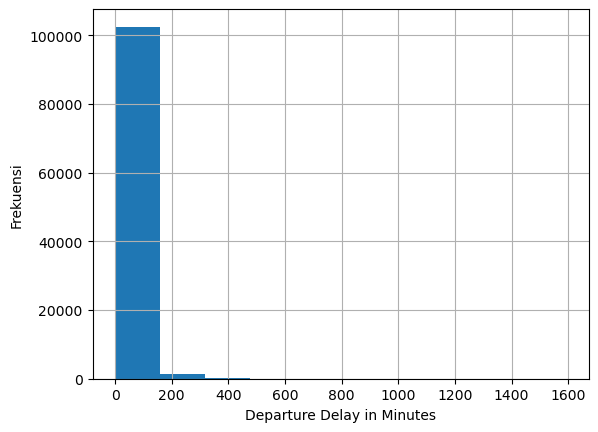

In [294]:
df['Departure Delay in Minutes'].hist()
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frekuensi')
plt.style.use('default')
plt.show()
# Skewed to the right


In [295]:
# D'Agustino and Pearson
from scipy.stats import normaltest
normaltest(df['Departure Delay in Minutes'])


NormaltestResult(statistic=131445.97600987297, pvalue=0.0)

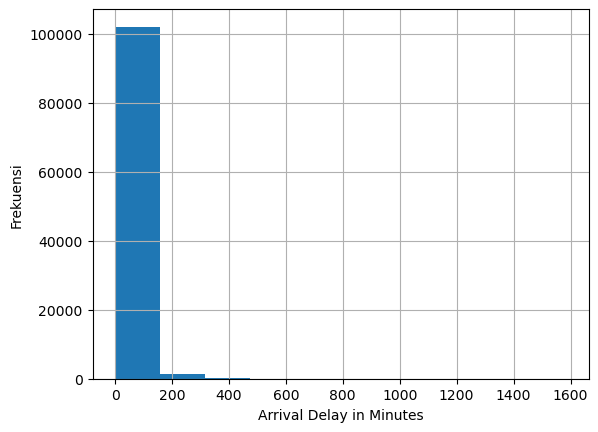

In [296]:
df['Arrival Delay in Minutes'].hist()
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frekuensi')
plt.show()
# Skewed to the right

In [297]:
# D'Agustino and Pearson
from scipy.stats import normaltest
normaltest(df['Arrival Delay in Minutes'].dropna())

NormaltestResult(statistic=129251.47199614844, pvalue=0.0)

Berdasarkan histogram dari kolom Departure Delay in Minutes, distribusi data terlihat berdistribusi skewed to the right. Selain itu melalui uji normalisasi, karena p-value < alpha=0,05 maka kita memiliki cukup bukti untuk menolak H0 dan artinya data tidak berdistribusi normal.  

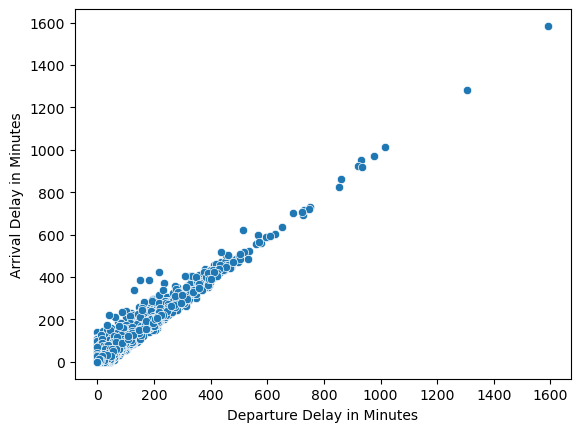

In [12]:
sns.scatterplot(data=df,x='Departure Delay in Minutes',y='Arrival Delay in Minutes')

plt.show()

In [12]:
df['Departure Delay in Minutes'].corr(df['Arrival Delay in Minutes'],method='spearman')

0.7408426238339384

* Grafik scatterplot antara Departure Delay in Minutes dengan Arrival Delay in Minutes menunjukkan hubungan yang positif monotonik dan linear.  
* Nilai korelasi antara Departure Delay in Minutes dengan Arrival Delay in Minutes memiliki nilai sebesar 0,741 yang mengartikan bahwa hubungan antara delay pada saat keberangkatan dalam menit dan delay pada saat kedatangan dalam menit berbanding lurus atau semakin lama delay pada saat keberangkatan maka delay pada saat kedatangan akan semakin lama juga. Nilai absolut 0,741 mengartikan bahwa kekuatan hubungan korelasi antara Departure Delay in Minutes dengan Arrival Delay in Minutes kuat.

Maka, dalam pengisian data kosong pada kolom Arrival Delay in Minutes, kita akan menggunakan median Arrival Delay in Minutes berdasarkan pada Departure Delay in Minutes karena terlihat hubungan yang kuat antara lama delay pada saat keberangkatan dan lama delay pada saat kedatangan. Selain itu kita menggunakan median untuk memberikan representasi kecenderungan central tendency data yang lebih baik pada data yang tidak berdistribusi normal dan tidak sensitif terhadap outlier.

Sekarang, kita akan mencoba melakukan pengecekan median Arrival Delay in Minutes berdasarkan kolom Departure Delay in Minutes.

In [165]:
df.groupby('Departure Delay in Minutes').median()['Arrival Delay in Minutes']

Departure Delay in Minutes
0       0.0   
1       0.0   
2       0.0   
3       0.0   
4       0.0   
       ...    
933     920.0 
978     970.0 
1017    1011.0
1305    1280.0
1592    1584.0
Name: Arrival Delay in Minutes, Length: 446, dtype: float64

Sekarang, kita akan mengisi data kosong di kolom Arrival Delay in Minutes dengan mean Arrival Delay in Minutes berdasarkan kolom Departure Delay in Minutes.

In [13]:
# Mengisi data kosong di kolom Arrival Delay in Minutes dengan mean Arrival Delay in Minutes berdasarkan kolom Departure Delay in Minutes.
df['Arrival Delay in Minutes']=df.groupby('Departure Delay in Minutes')['Arrival Delay in Minutes'].apply(lambda x:x.fillna(x.median()))

In [299]:
df.loc[index_nan][['Departure Delay in Minutes','Arrival Delay in Minutes']]

,Departure Delay in Minutes,Arrival Delay in Minutes
213,31,26.0
1124,38,33.0
1529,11,5.0
2004,41,36.0
2108,1,0.0
...,...,...
102067,230,228.0
102384,55,49.0
102552,0,0.0
102960,0,0.0


In [14]:
# Jumlah data yang kosong
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             1
satisfaction                         0
dtype: int64

Terlihat bahwa masih terdapat 1 data pada kolom Arrival Delay in Minutes yang memiliki data yang kosong setelah dilakukan pengisian sehingga akan dilakukan pengecekan terkait data yang masih kosong tersebut.

In [15]:
df.loc[df['Arrival Delay in Minutes'].isna()==True]

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
71557,Male,Loyal Customer,50,Business Travel,Business,95,1,3,3,3,...,4,3,4,4,3,2,3,455,NaN,Neutral or Dissatisfied


Terlihat bahwa masih terdapat data kosong pada kolom Arrival Delay in Minutes pada data dengan index 71557. Data pada kolom Arrival Delay in Minutes masih berisi NaN karena tidak ada data pada baris lainnya yang memiliki Departure Delay in Minutes sebesar 455 menit sehingga kita tidak bisa mengisi data kosong di kolom Arrival Delay in Minutes pada data index 71557 dengan mean Arrival Delay in Minutes berdasarkan kolom Departure Delay in Minutes. Maka dari itu khusus untuk data ini, kita akan menyamakan isi kolom Arrival Delay in Minutes dengan isi kolom Departure Delay in Minutes.

In [16]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(455)

In [17]:
# Jumlah data yang kosong
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Kini sudah tidak ada lagi data yang kosong.

## 2.5 Handling Outlier

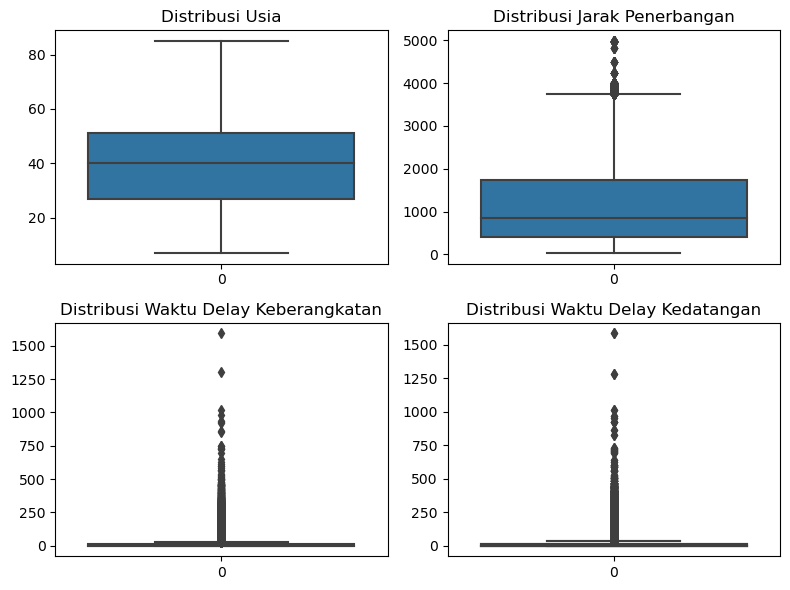

In [74]:
figure,axis=plt.subplots(2,2,figsize=(8,6))

sns.boxplot(data=df['Age'],ax=axis[0,0]).set_title('Distribusi Usia')
sns.boxplot(data=df['Flight Distance'],ax=axis[0,1]).set_title('Distribusi Jarak Penerbangan')
sns.boxplot(data=df['Departure Delay in Minutes'],ax=axis[1,0]).set_title('Distribusi Waktu Delay Keberangkatan')
sns.boxplot(data=df['Arrival Delay in Minutes'],ax=axis[1,1]).set_title('Distribusi Waktu Delay Kedatangan')
sns.boxplot(data=df['Arrival Delay in Minutes'],ax=axis[1,1]).set_title('Distribusi Waktu Delay Kedatangan')

plt.tight_layout()
plt.show()


Walaupun terlihat terdapat outlier pada kolom jarak penerbangan, waktu delay keberangkatan, dan waktu delay kedatangan, namun kita tidak akan mendrop outlier karena outlier tidak disebabkan oleh data yang salah dimasukkan atau data yang salah diukur. Menurut domain knowledge, outlier yang ada memang merepresentasikan variasi data yang normal terjadi seperti jarak penerbangan yang sangat jauh pada penerbangan tertentu dan waktu delay keberangkatan maupun kedatangan yang sangat lama pada penerbangan tertentu. 

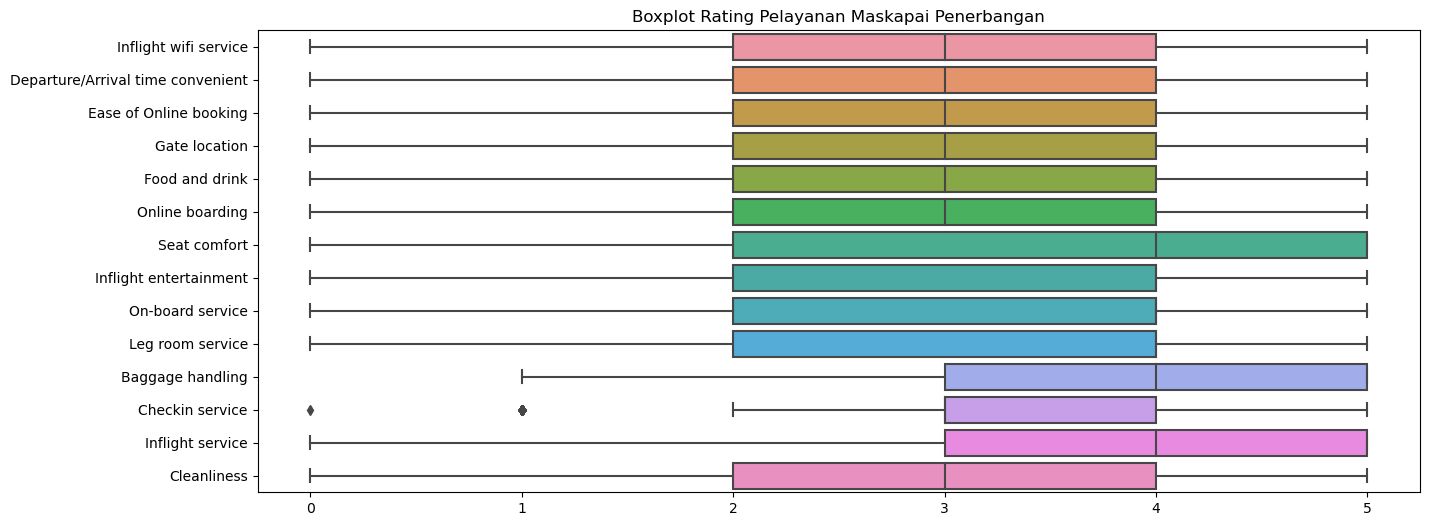

In [33]:
plt.subplots(figsize=(15,6))
sns.boxplot(data=df[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']], orient='h').set_title('Boxplot Rating Pelayanan Maskapai Penerbangan')

plt.show()

Selain itu walaupun terlihat terdapat outlier pada kolom checkin service, kita tidak bisa mengatakan bahwa penumpang yang mengisi skala 1 pada kolom checkin service merupakan outlier. Hal ini disebabkan karena outlier tidak benar-benar ada dalam skala Likert dan outlier yang ada memang merepresentasikan variasi jawaban hasil survei penumpang. Oleh karena itu, kita juga tidak akan mendrop outlier pada kolom checkin service.

## 2.6 Cleaned Data
Setelah selesai melakukan pembersihan data, berikut adalah informasi dari data yang sudah dibersihkan

In [18]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103904, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Male, Female]"
1,Customer Type,object,0,2,"[Loyal Customer, Disloyal Customer]"
2,Age,int64,0,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3..."
3,Type of Travel,object,0,2,"[Personal Travel, Business Travel]"
4,Class,object,0,3,"[Eco Plus, Business, Eco]"
5,Flight Distance,int64,0,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8..."
6,Inflight wifi service,int64,0,6,"[3, 2, 4, 1, 5, 0]"
7,Departure/Arrival time convenient,int64,0,6,"[4, 2, 5, 3, 1, 0]"
8,Ease of Online booking,int64,0,6,"[3, 2, 5, 4, 1, 0]"
9,Gate location,int64,0,6,"[1, 3, 2, 5, 4, 0]"


Setelah data dibersihan, tidak terjadi perubahan jumlah data dari yang sebelumnya berjumlah 103.904 baris data karena tidak ada data yang dihapus dan data yang kosong telah diisi dengan data yang relevan sehingga kini data yang telah dibersihkan dapat digunakan untuk analisa lebih lanjut.

# 3. Statistics Summary

In [19]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.236820
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.800995
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [20]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business Travel,Business,Neutral or Dissatisfied
freq,52727,84923,71655,49665,58879


Secara umum informasi yang didapatkan berdasarkan data di atas adalah sebagai berikut:
* Terdapat 103.904 data dan 23 feature pada dataset.
* Rata-rata jarak penerbangan adalah 1189 km dengan standar deviasi yang cukup besar yaitu sebesar 997 km sehingga mengartikan bahwa penerbangan yang dilakukan maskapai penerbangan bervariasi antara penerbangan jarak dekat maupun penerbangan jarak jauh.
* Rata-rata delay pada saat keberangkatan maupun kedatangan memiliki waktu yang cukup sama yaitu sekitar 15 menit dengan standar deviasi sebesar sekitar 38 menit.
* Median dari delay pada saat keberangkatan maupun kedatangan adalah 0 sehingga artinya 50% dari penerbangan tidak mengalami delay.
* Proporsi penumpang pria dan wanita relatif mirip dimana 51% penumpang merupakan wanita dan sisanya merupakan pria.
* Mayoritas penumpang yaitu sebesar 82% merupakan loyal customer yang artinya sudah menggunakan maskapai penerbangan sejak lama dan mayoritas penumpang yaitu sebesar 69% memilih maskapai penerbangan untuk melakukan business travel.
* Secara umum, 57% penumpang merasa netral atau tidak puas terhadap pelayanan penerbangan.

# 3.1 Distribusi Data

Sebelumnya kita perlu melihat distribusi data yang akan digunakan untuk dianalisa lebih lanjut.

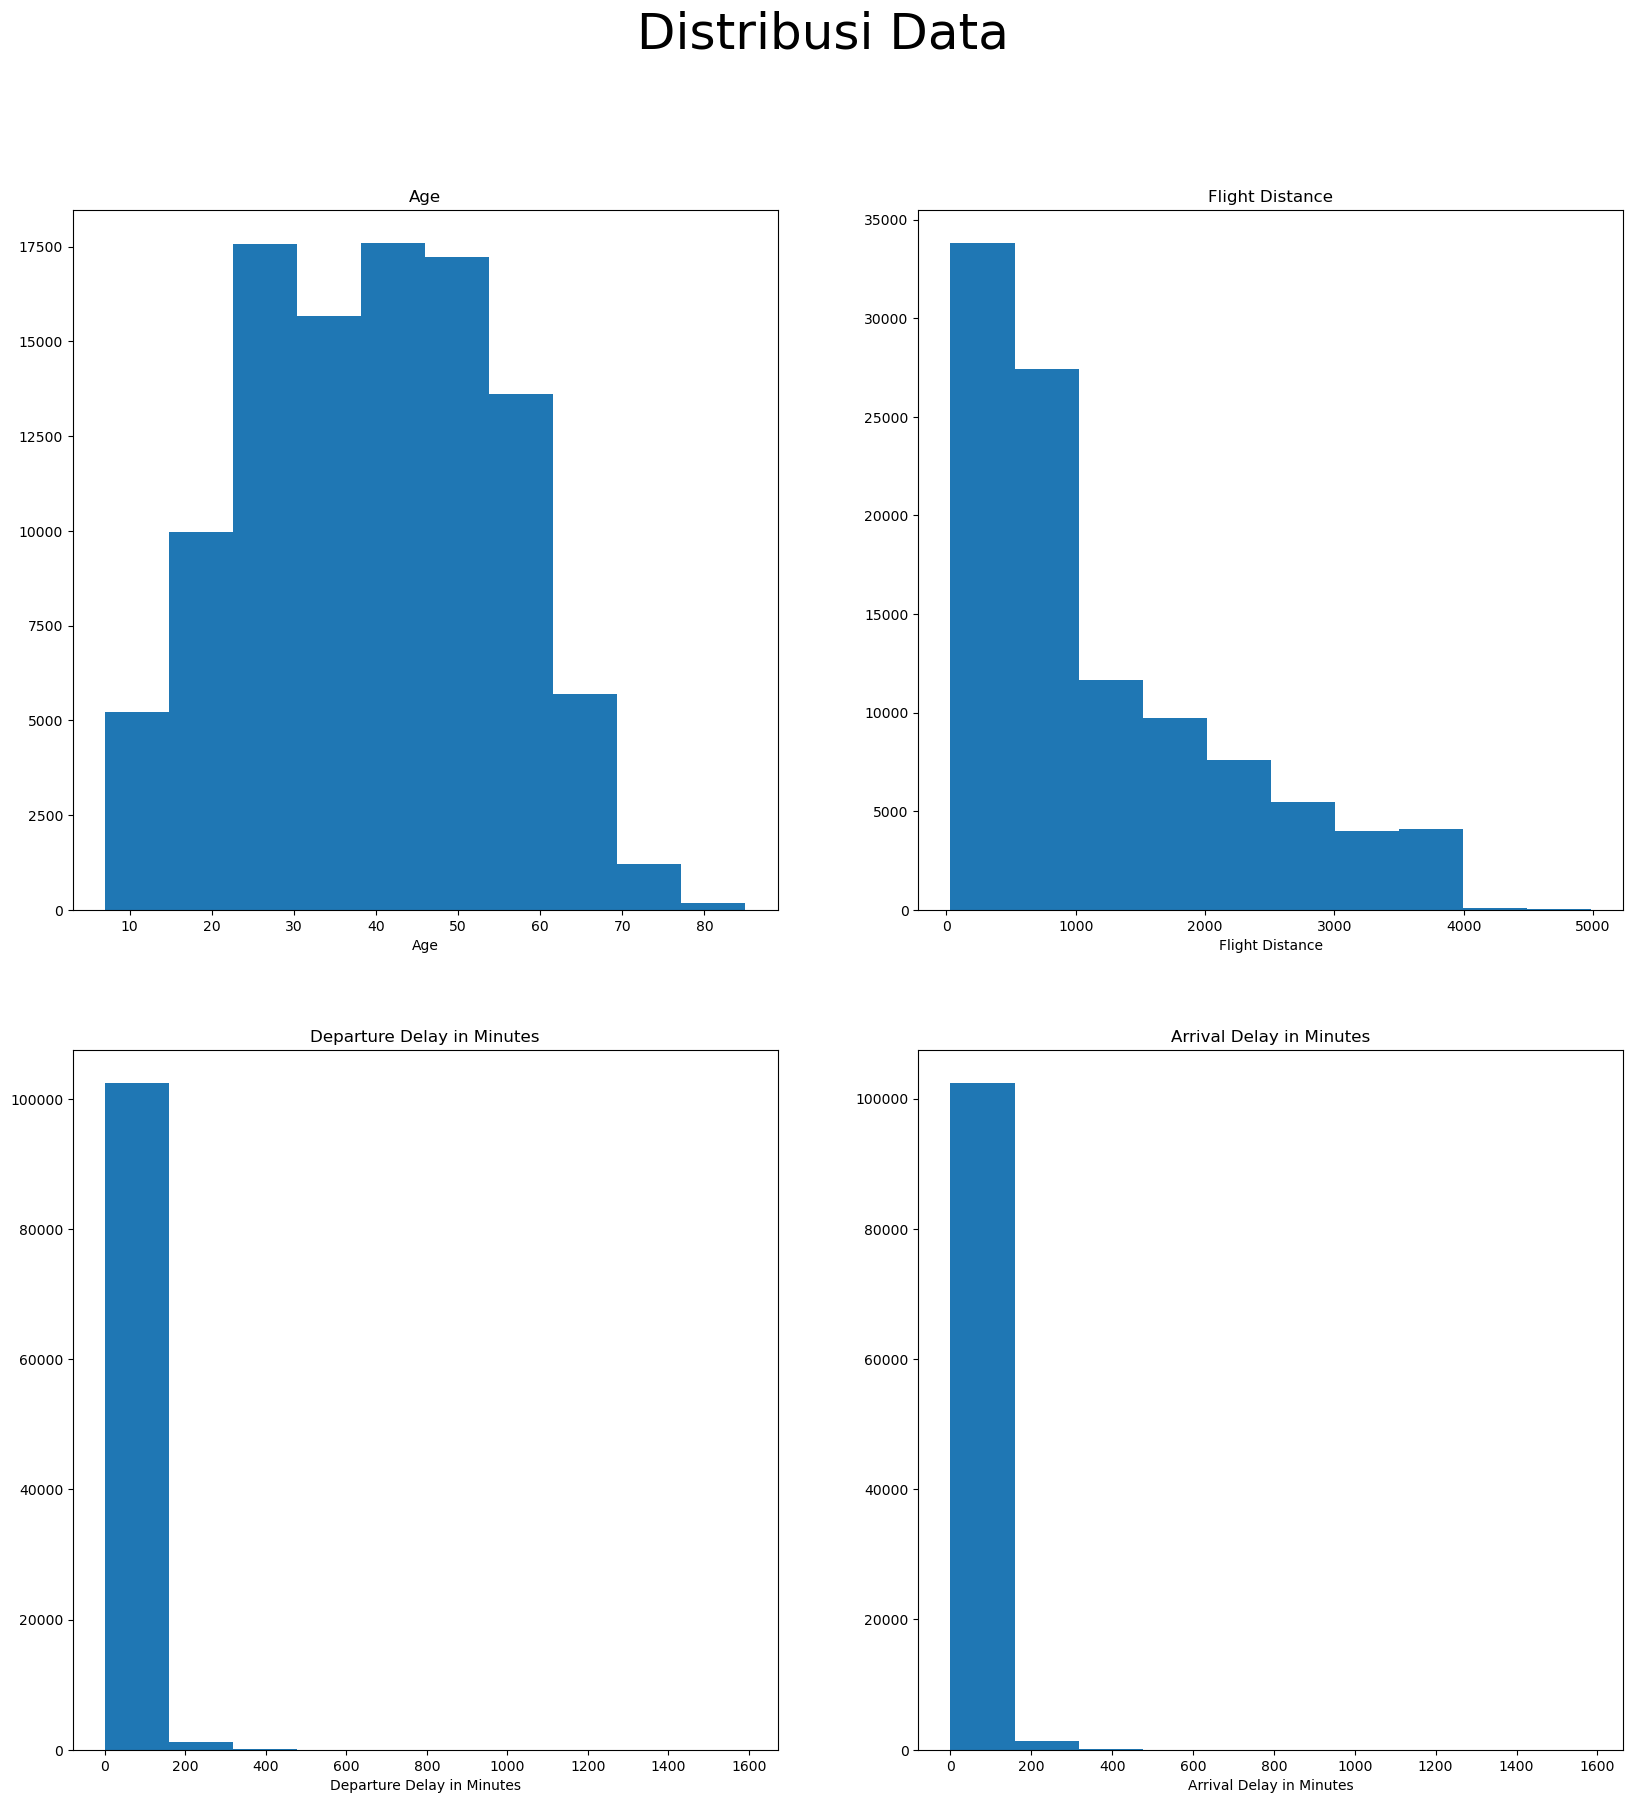

In [21]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1) 
plt.hist(df['Age'])
plt.xlabel('Age')
plt.title('Age')

plt.subplot(2,2,2) 
plt.hist(df['Flight Distance'])
plt.xlabel('Flight Distance')
plt.title('Flight Distance')

plt.subplot(2,2,3) 
plt.hist(df['Departure Delay in Minutes'])
plt.xlabel('Departure Delay in Minutes')
plt.title('Departure Delay in Minutes')

plt.subplot(2,2,4) 
plt.hist(df['Arrival Delay in Minutes'])
plt.xlabel('Arrival Delay in Minutes')
plt.title('Arrival Delay in Minutes')

plt.suptitle('Distribusi Data',size=36)

plt.show()

In [218]:
kolom=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

hasil=[]
for i in kolom:
    stats,pval=normaltest(df[i])
    if pval>0.05:
        hasil.append('Distribusi normal')
    else:
        hasil.append('Tidak berdistribusi normal')

pd.DataFrame({'Kolom':kolom, 'Distribusi':hasil})

,Kolom,Distribusi
0,Age,Tidak berdistribusi normal
1,Flight Distance,Tidak berdistribusi normal
2,Departure Delay in Minutes,Tidak berdistribusi normal
3,Arrival Delay in Minutes,Tidak berdistribusi normal


Berdasarkan histogram dan dan normality test, kolom Age, Flight Distance, Departure Delay in Minutes, dan Arrival Delay in Minutes tidak berdistribusi normal.

## 3.2 Correlation

Sekarang, kita akan melihat correlation untuk melihat hubungan antar variabel pada data.

In [199]:
corr=df.corr(method='spearman')
corr

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.072321,0.016518,0.036161,0.022983,-0.002103,0.020841,0.215725,0.161383,0.081574,0.070441,0.051864,-0.026338,0.039724,-0.031062,0.053716,-0.010894,-0.012458
Flight Distance,0.072321,1.000000,0.006456,-0.013443,0.066114,0.000750,0.046593,0.194100,0.137140,0.105091,0.099600,0.118062,0.060355,0.071707,0.059940,0.080697,0.026570,-0.001252
Inflight wifi service,0.016518,0.006456,1.000000,0.338860,0.711816,0.332789,0.132695,0.435733,0.118909,0.199700,0.116584,0.149572,0.113337,0.042710,0.105462,0.130628,-0.030202,-0.036651
Departure/Arrival time convenient,0.036161,-0.013443,0.338860,1.000000,0.439947,0.450214,0.002934,0.061735,0.011934,-0.009296,0.071701,0.007048,0.088548,0.099762,0.090800,0.013951,-0.002986,-0.005406
Ease of Online booking,0.022983,0.066114,0.711816,0.439947,1.000000,0.461921,0.029603,0.367667,0.026806,0.042821,0.037403,0.094560,0.037002,0.010690,0.035031,0.015249,-0.010656,-0.013828
Gate location,-0.002103,0.000750,0.332789,0.450214,0.461921,1.000000,-0.001142,-0.001374,0.001735,0.003030,-0.027975,-0.005588,-0.006472,-0.035812,-0.007133,-0.003750,0.004324,0.005600
Food and drink,0.020841,0.046593,0.132695,0.002934,0.029603,-0.001142,1.000000,0.241274,0.557754,0.610246,0.058136,0.031457,0.045529,0.083811,0.043877,0.647056,-0.021389,-0.032848
Online boarding,0.215725,0.194100,0.435733,0.061735,0.367667,-0.001374,0.241274,1.000000,0.440087,0.302319,0.175737,0.139163,0.118017,0.217763,0.108950,0.345629,-0.033044,-0.049633
Seat comfort,0.161383,0.137140,0.118909,0.011934,0.026806,0.001735,0.557754,0.440087,1.000000,0.603980,0.147481,0.119710,0.104604,0.199209,0.098379,0.667196,-0.020337,-0.037239
Inflight entertainment,0.081574,0.105091,0.199700,-0.009296,0.042821,0.003030,0.610246,0.302319,0.603980,1.000000,0.436907,0.314101,0.395773,0.121436,0.422208,0.680506,-0.027402,-0.044209


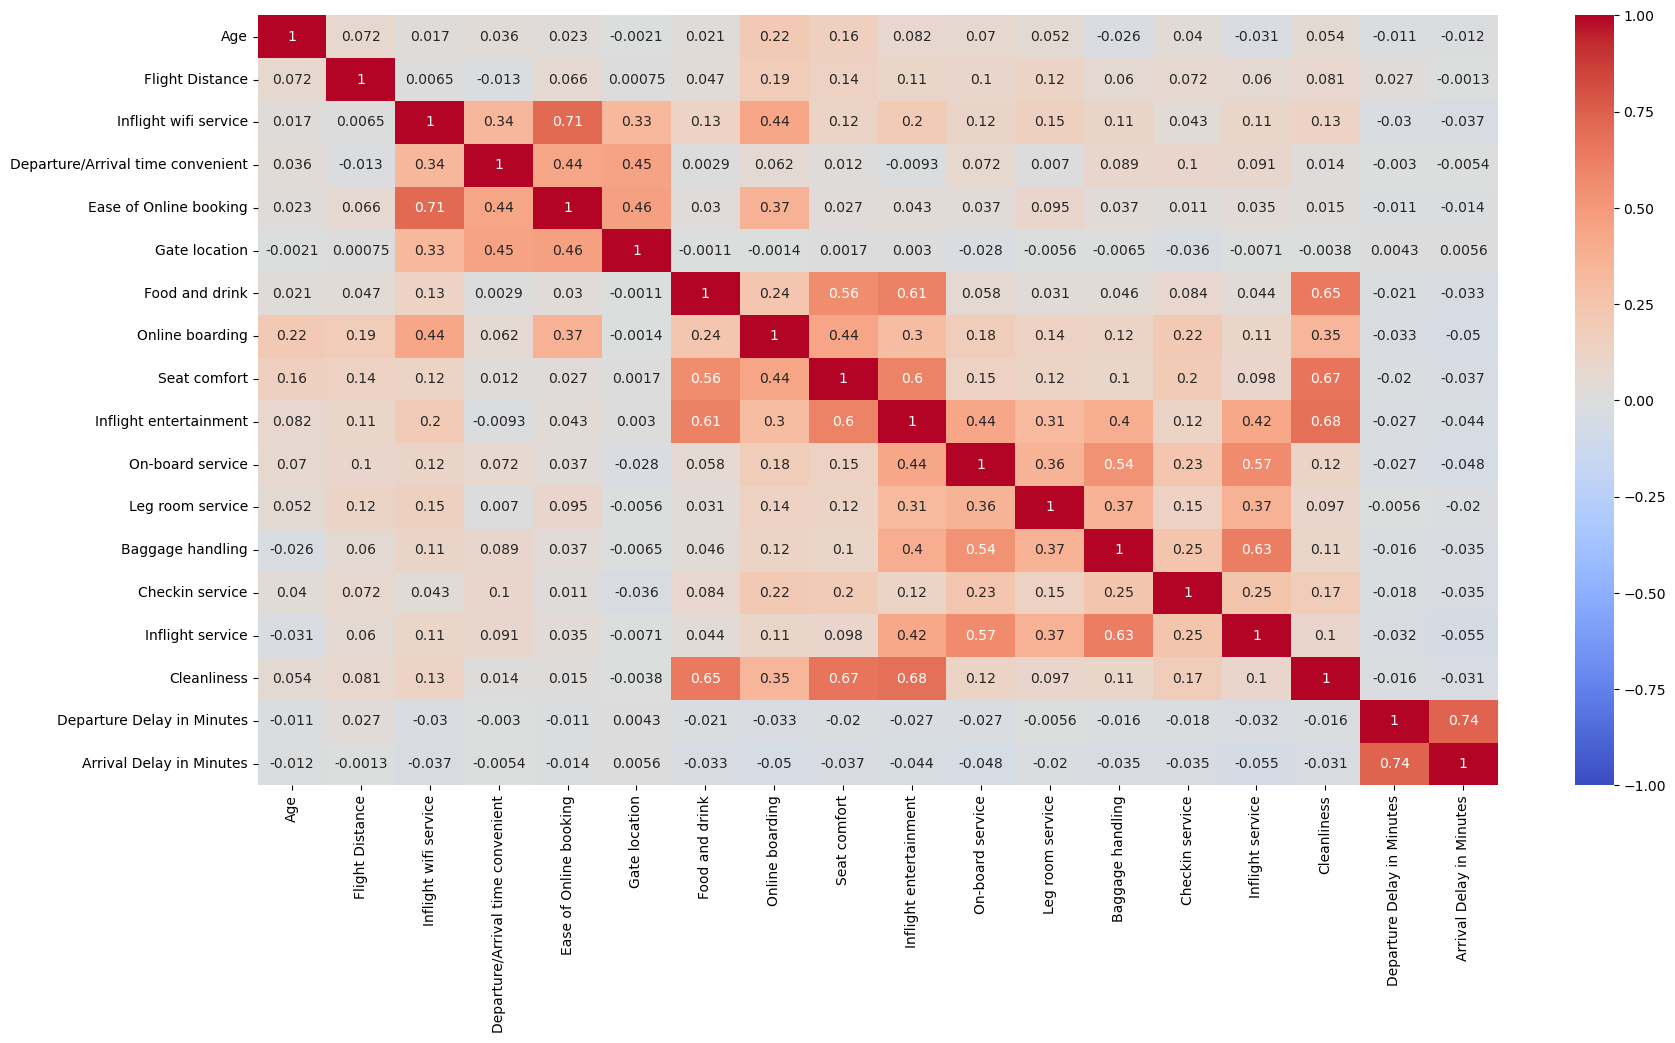

In [280]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

Nilai korelasi antara Departure Delay in Minutes dengan Arrival Delay in Minutes memiliki nilai terbesar yaitu 0,74 sehingga menunjukkan bahwa hubungan korelasi yang paling kuat diantara semua variabel adalah hubungan antara Departure Delay in Minutes dengan Arrival Delay in Minutes. Hal ini juga masuk akal karena semakin lama delay pada saat keberangkatan maka delay pada saat kedatangan akan semakin lama juga.

# 4. Data Analysis

Setelah melalui tahapan data cleaning, kita sudah dapat melakukan analisis data untuk mengetahui tingkat kepuasaan penumpang setelah melakukan penerbangan serta faktor-faktor yang mempengaruhi penumpang yang puas dan penumpang yang tidak puas akan pelayanan maskapai penerbangan.

Analisis akan dilakukan dengan melihat kepuasan penumpang yang merasa puas dan netral atau tidak puas secara umum serta mencari faktor-faktor yang mempengaruhi kepuasan penumpang terkait layanan maskapai penerbangan berdasarkan hasil survei serta segmentasi dan riwayat penerbangan penumpang.


## 4.1 Kepuasan Penumpang Maskapai Penerbangan Secara Umum

In [304]:
df['satisfaction'].value_counts()

Neutral or Dissatisfied    58879
Satisfied                  45025
Name: satisfaction, dtype: int64

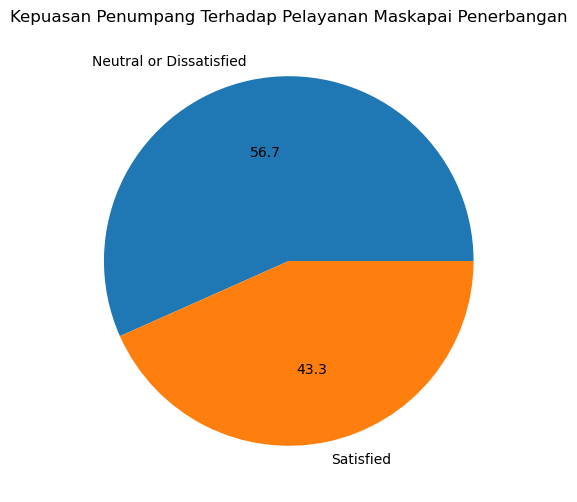

In [75]:
vc=df['satisfaction'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vc,labels=vc.index,
    autopct='%.1f')
plt.title('Kepuasan Penumpang Terhadap Pelayanan Maskapai Penerbangan')
plt.show()

Secara keseluruhan, mayoritas penumpang yaitu sebesar 56,7% merasa netral atau tidak puas terhadap layanan maskapai penerbangan. Oleh karena itu, kita perlu mengetahui faktor-faktor yang mempengaruhi kepuasan penumpang terkait layanan maskapai penerbangan untuk mendapatkan acuan bagi pengembangan  pelayanan penerbangan di masa mendatang demi meningkatkan loyalitas pelanggan. 

## 4.2 Faktor-Faktor yang Mempengaruhi Kepuasan Penumpang Terkait Layanan Maskapai Penerbangan

Kita akan mencari faktor-faktor yang mempengaruhi kepuasan penumpang terkait layanan maskapai penerbangan berdasarkan hasil survei kepuasan penumpang secara umum yang sudah diisi penumpang serta segmentasi dan riwayat penerbangan penumpang. Dengan mengetahui segmentasi dan riwayat penerbangan penumpang yang merasa puas maupun netral atau tidak puas terhadap pelayanan maskapai penerbangan, perusahaan maskapai penerbangan dapat mengembangkan rencana perbaikan layanan yang lebih sesuai dengan karakteristik penumpang tertentu. 

## 4.2.1 Berdasarkan Hasil Survei Kepuasan Secara Umum

In [35]:
survei_satisfaction=df.groupby('satisfaction').mean()[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]
survei_satisfaction

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
satisfaction,,,,,,,,,,,,,,
Neutral or Dissatisfied,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123
Satisfied,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342


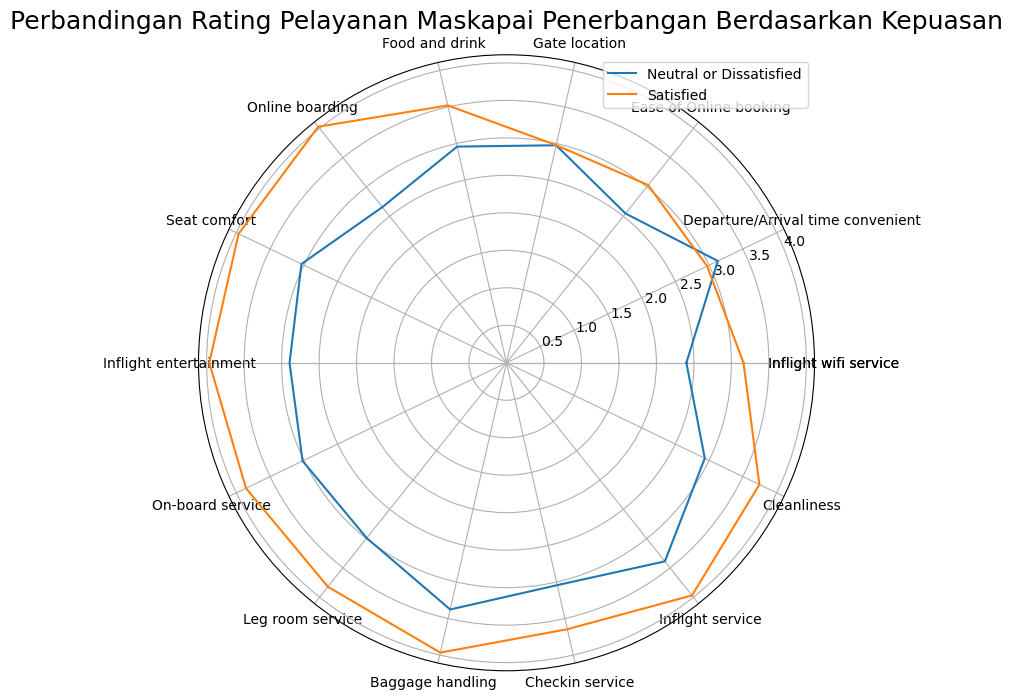

In [40]:
categories = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
categories = [*categories, categories[0]]

# Median
neutralordissatisfied = survei_satisfaction.loc['Neutral or Dissatisfied'].values
satisfied = survei_satisfaction.loc['Satisfied'].values
neutralordissatisfied = [*neutralordissatisfied, neutralordissatisfied[0]]
satisfied  = [*satisfied , satisfied [0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(neutralordissatisfied))

plt.figure(figsize=(16, 8))
plt.subplot(polar=True)
plt.plot(label_loc, neutralordissatisfied, label='Neutral or Dissatisfied')
plt.plot(label_loc, satisfied, label='Satisfied')
plt.title('Perbandingan Rating Pelayanan Maskapai Penerbangan Berdasarkan Kepuasan', size=18)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc='best')
plt.show()

Aspek yang masih dinilai tidak setinggi aspek pelayanan lainnya baik oleh penumpang yang puas maupun netral atau tidak puas terhadap pelayanan secara keseluruhan adalah layanan wifi di dalam pesawat, kemudahan online booking, lokasi gate, kenyamanan waktu keberangkatan dan kedatangan. Maka pada tahap selanjutnya, akan dilihat faktor-faktor yang menyebabkan aspek-aspek tersebut masih dinilai tidak setinggi aspek pelayanan lainnya berdasarkan segmentasi dan riwayat penerbangan penumpang.

## 4.2.2 Berdasarkan Segmentasi dan Riwayat Penerbangan Penumpang

### 1. Berdasarkan Customer Type
Sebelumnya kita akan menganalisa tipe penumpang berdasarkan loyalitas mereka kepada maskapai penerbangan untuk melihat karakteristik penumpang yang sudah lama memilih maskapai penerbangan dengan penumpang yang baru-baru ini memilih maskapai penerbangan.

In [312]:
df_ct_customertypesatisfaction=pd.crosstab(df['Customer Type'],df['satisfaction'],normalize='index')
df_ct_customertypesatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
Disloyal Customer,0.763342,0.236658
Loyal Customer,0.522709,0.477291


In [537]:
df_ct_customertypesatisfaction2=pd.crosstab(df['Customer Type'],df['satisfaction'])

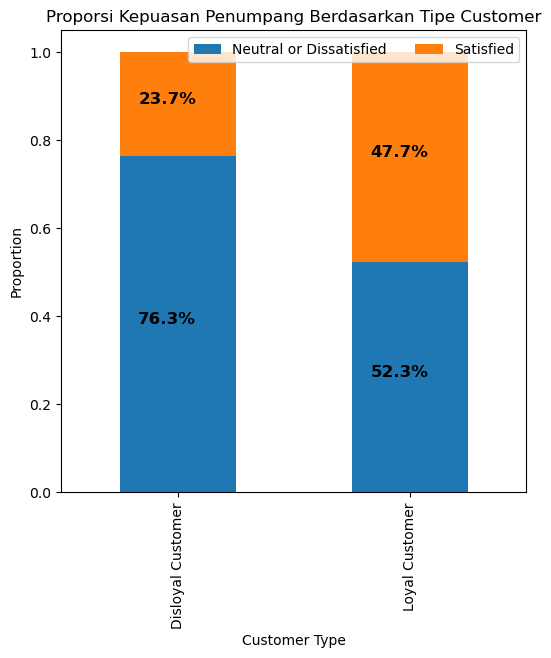

In [544]:
df_ct_customertypesatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Customer Type")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_customertypesatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_customertypesatisfaction.loc[x],
                                   df_ct_customertypesatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proporsi Kepuasan Penumpang Berdasarkan Tipe Customer')
plt.show()

Disloyal Customer lebih cenderung untuk merasa netral atau tidak puas terhadap pelayanan layanan maskapai penerbangan dibandingkan Loyal Customer.

Sekarang kita akan menguji secara statistik apakah Disloyal Customer yang merasa netral atau tidak puas lebih besar dibandingkan dengan proporsi Loyal Customer yang merasa netral atau tidak puas.

H0: Proporsi Disloyal Customer yang merasa netral atau tidak puas sama dengan proporsi Loyal Customer yang merasa netral atau tidak puas   
H1: Proporsi Disloyal Customer yang merasa netral atau tidak puas lebih besar dibandingkan proporsi Loyal Customer yang merasa netral atau tidak puas 

In [114]:
df_ct_customertypesatisfaction=pd.crosstab(df['Customer Type'],df['satisfaction'])
df_ct_customertypesatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Customer Type,,
Disloyal Customer,14489,4492
Loyal Customer,44390,40533


In [115]:
df_ct_customertypesatisfaction['Neutral or Dissatisfied']

Customer Type
Disloyal Customer    14489
Loyal Customer       44390
Name: Neutral or Dissatisfied, dtype: int64

In [116]:
df_ct_customertypesatisfaction.sum(axis=1)

Customer Type
Disloyal Customer    18981
Loyal Customer       84923
dtype: int64

In [117]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(df_ct_customertypesatisfaction['Neutral or Dissatisfied'],df_ct_customertypesatisfaction.sum(axis=1),alternative='larger')

(60.483557225689474, 0.0)

P-value<0.05, maka kita punya cukup bukti untuk menolak H0 sehingga proporsi Disloyal Customer yang merasa netral atau tidak puas lebih besar dibandingkan proporsi Loyal Customer yang merasa netral atau tidak puas. Hal ini masuk akal karena tentu jika penumpang yang merasa tidak puas akan pelayanan maskapai penerbangan tidak akan loyal dan tidak akan tetap memilih maskapai penerbangan tersebut.

Sekarang, kita akan melihat lebih lanjut perbedaan karakteristik dari Disloyal Customer dengan Loyal Customer. 

In [314]:
df_ct_customertypegender=pd.crosstab(df['Customer Type'],df['Gender'],normalize='index')
df_ct_customertypegender

Gender,Female,Male
Customer Type,,
Disloyal Customer,0.541015,0.458985
Loyal Customer,0.499959,0.500041


In [545]:
df_ct_customertypegender2=pd.crosstab(df['Customer Type'],df['Gender'])

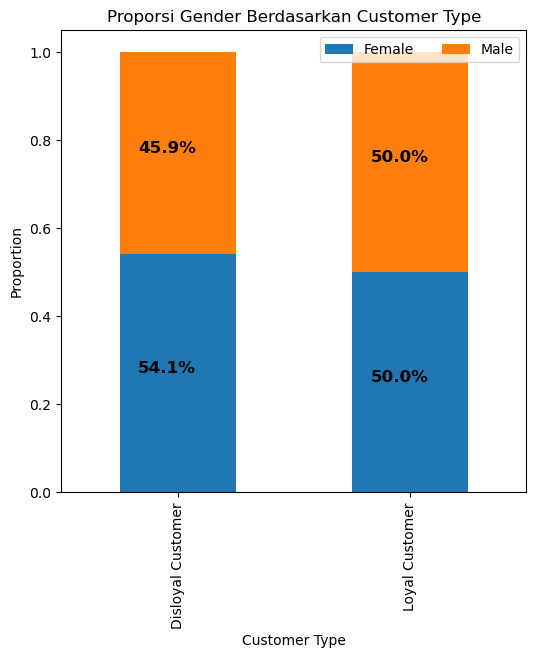

In [551]:
df_ct_customertypegender.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Customer Type")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_customertypegender2.index.values]):
    for (proportion, y_loc) in zip(df_ct_customertypegender.loc[x],
                                   df_ct_customertypegender.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proporsi Gender Berdasarkan Customer Type')
plt.show()

In [316]:
df.pivot_table(values='Gender',index=['Customer Type','Type of Travel'],columns='Class',aggfunc='count')

Class                              Business    Eco  Eco Plus
Customer Type     Type of Travel                            
Disloyal Customer Business Travel      7345  10761       711
                  Personal Travel        11    149         4
Loyal Customer    Business Travel     40163   9496      3179
                  Personal Travel      2146  26339      3600

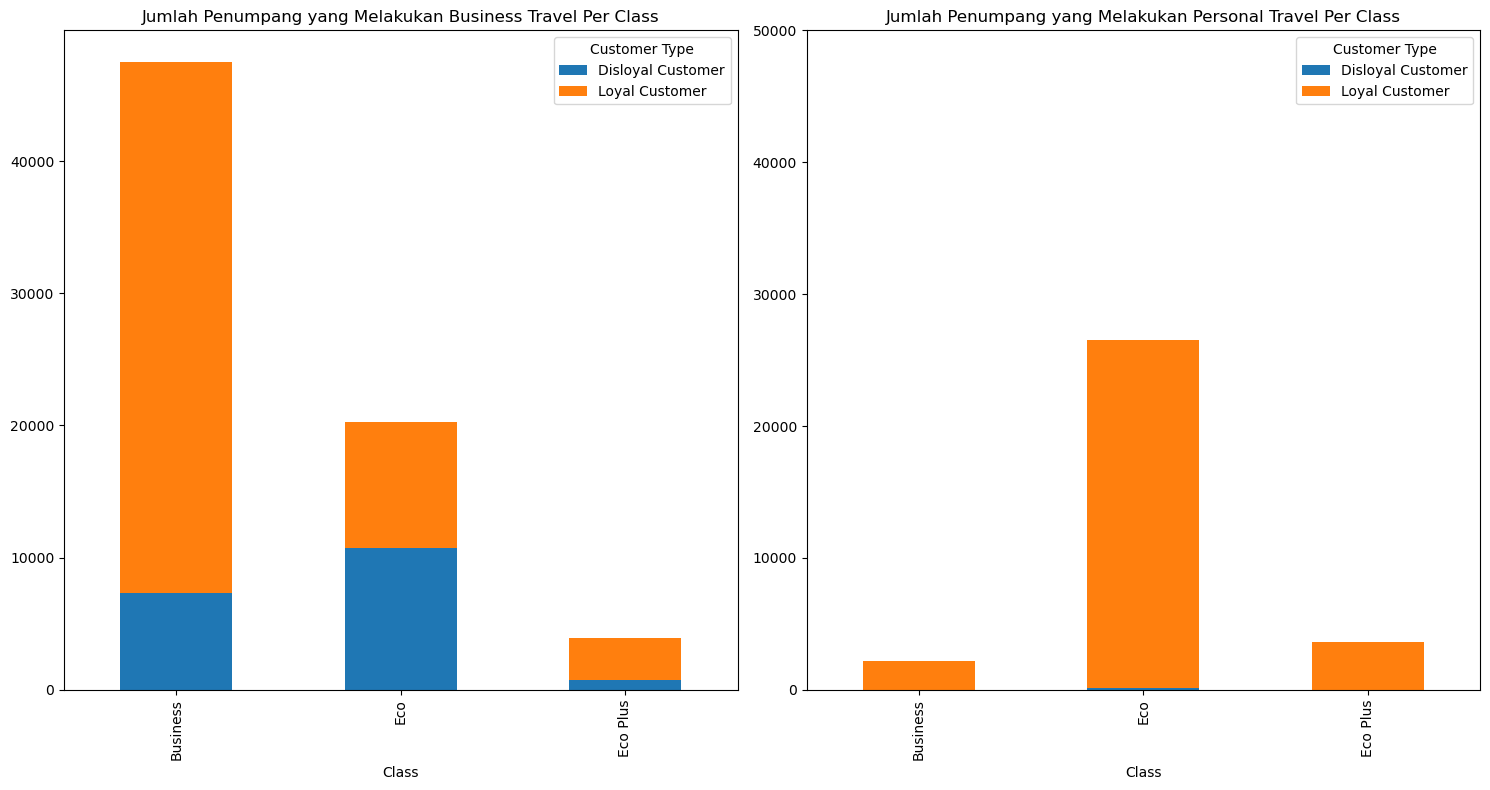

In [520]:
df_plot_business=df[df['Type of Travel']=='Business Travel'].groupby(['Customer Type','Class']).size().reset_index().pivot(columns='Customer Type', index='Class', values=0)
df_plot_personal=df[df['Type of Travel']=='Personal Travel'].groupby(['Customer Type','Class']).size().reset_index().pivot(columns='Customer Type', index='Class', values=0)

figure,axis=plt.subplots(1,2,figsize=(15,8))

df_plot_business.plot(kind='bar',stacked=True,ax=axis[0]).set_title('Jumlah Penumpang yang Melakukan Business Travel Per Class')
df_plot_personal.plot(kind='bar',stacked=True,ax=axis[1]).set_title('Jumlah Penumpang yang Melakukan Personal Travel Per Class')

plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

In [377]:
df.groupby('Customer Type').median()['Age']

Customer Type
Disloyal Customer    27.0
Loyal Customer       43.0
Name: Age, dtype: float64

In [390]:
df.groupby('Customer Type').median()['Flight Distance']

Customer Type
Disloyal Customer    598.0
Loyal Customer       925.0
Name: Flight Distance, dtype: float64

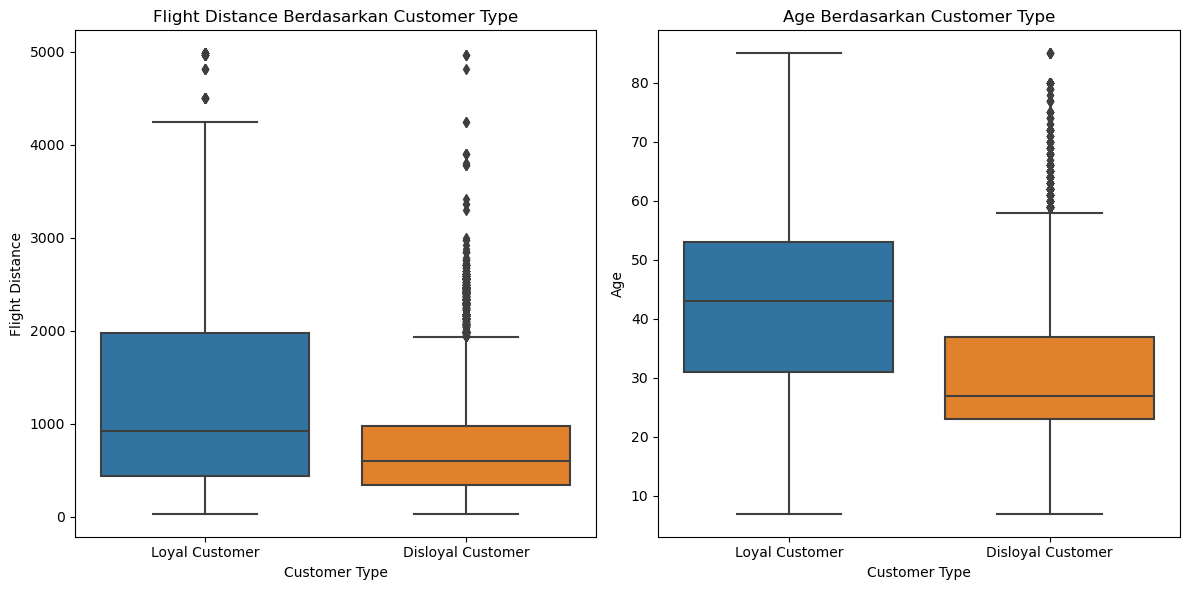

In [78]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Age',x='Customer Type',ax=axis[1]).set_title('Age Berdasarkan Customer Type')
sns.boxplot(data=df,y='Flight Distance',x='Customer Type',ax=axis[0]).set_title('Flight Distance Berdasarkan Customer Type')

plt.tight_layout()
plt.show()

Karakteristik dari penumpang yang merupakan Disloyal Customer adalah sebagai berikut:
* Proporsi Disloyal Customer wanita dan pria tidak terlalu jauh berbeda
* Penumpang yang melakukan Business Travel cenderung lebih tidak loyal dibandingkan penumpang yang melakukan Personal Travel terutama pada Class Eco
* Mayoritas Disloyal Customer memiliki median usia lebih muda yaitu memiliki media usia 27 tahun dibandingkan Loyal Customer yang memiliki median usia 43 tahun
* Mayoritas Disloyal Customer melakukan perjalanan dengan jarak yang lebih dekat yaitu memiliki median jarak perjalanan 598 miles dibandingkan Loyal Customer yang memiliki jarak perjalanan 925 miles

### 2. Berdasarkan Gender Penumpang

In [549]:
# Proporsi Kepuasaan Penumpang Pria dan Wanita
df_ct_gendersatisfaction=pd.crosstab(df['Gender'],df['satisfaction'],normalize='index')
df_ct_gendersatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Female,0.572629,0.427371
Male,0.560525,0.439475


In [547]:
df_ct_gendersatisfaction2=pd.crosstab(df['Gender'],df['satisfaction'])

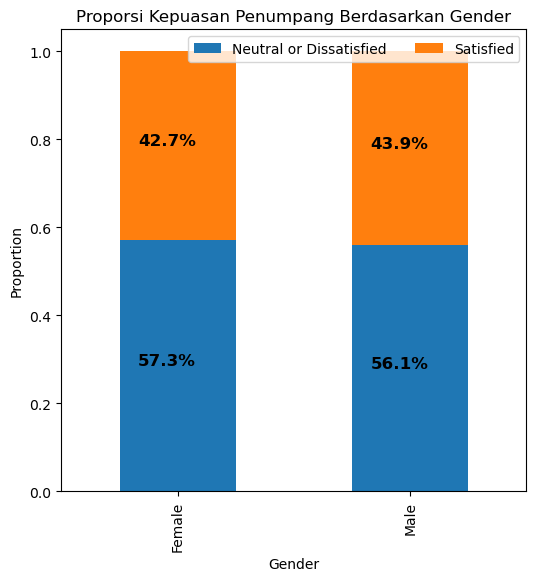

In [550]:
df_ct_gendersatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Gender")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_gendersatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_gendersatisfaction.loc[x],
                                   df_ct_gendersatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proporsi Kepuasan Penumpang Berdasarkan Gender')
plt.show()

Secara umum, kepuasan pelayanan maskapai penerbangan tidak terlalu dipengaruhi oleh jenis kelamin penumpang karena proporsi penumpang pria dan wanita yang merasa netral atau tidak puas akan pelayanan maskapai penerbangan kurang lebih sama. Pada penumpang pria maupun wanita, mayoritas masih merasa netral atau tidak puas akan pelayanan yang dirasakan.

Sekarang kita akan menguji secara statistik, apakah proporsi penumpang wanita yang merasa netral atau tidak puas memang kurang lebih sama dengan proporsi penumpang pria yang merasa netral atau tidak puas.

H0: Proporsi penumpang wanita yang merasa netral atau tidak puas sama dengan proporsi penumpang pria yang merasa netral atau tidak puas.   
H1: Proporsi penumpang wanita yang merasa netral atau tidak puas lebih kecil dibandingkan proporsi penumpang pria yang merasa netral atau tidak puas. 

In [350]:
df_ct_gendersatisfaction=pd.crosstab(df['Gender'],df['satisfaction'])
df_ct_gendersatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Gender,,
Female,30193,22534
Male,28686,22491


In [351]:
df_ct_gendersatisfaction['Neutral or Dissatisfied']

Gender
Female    30193
Male      28686
Name: Neutral or Dissatisfied, dtype: int64

In [352]:
df_ct_gendersatisfaction.sum(axis=1)

Gender
Female    52727
Male      51177
dtype: int64

In [354]:
from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(df_ct_gendersatisfaction['Neutral or Dissatisfied'],df_ct_gendersatisfaction.sum(axis=1),alternative='smaller')

(3.9361998006419423, 0.9999586089701724)

P-value>0.05, maka kita tidak punya cukup bukti untuk menolak H0 sehingga proporsi penumpang wanita yang merasa netral atau tidak puas tidak lebih kecil dibandingkan proporsi penumpang pria yang merasa netral atau tidak puas atau bisa dikatakan proporsi penumpang wanita yang merasa netral atau tidak puas kurang lebih sama dengan proporsi penumpang pria yang merasa netral atau tidak puas. 

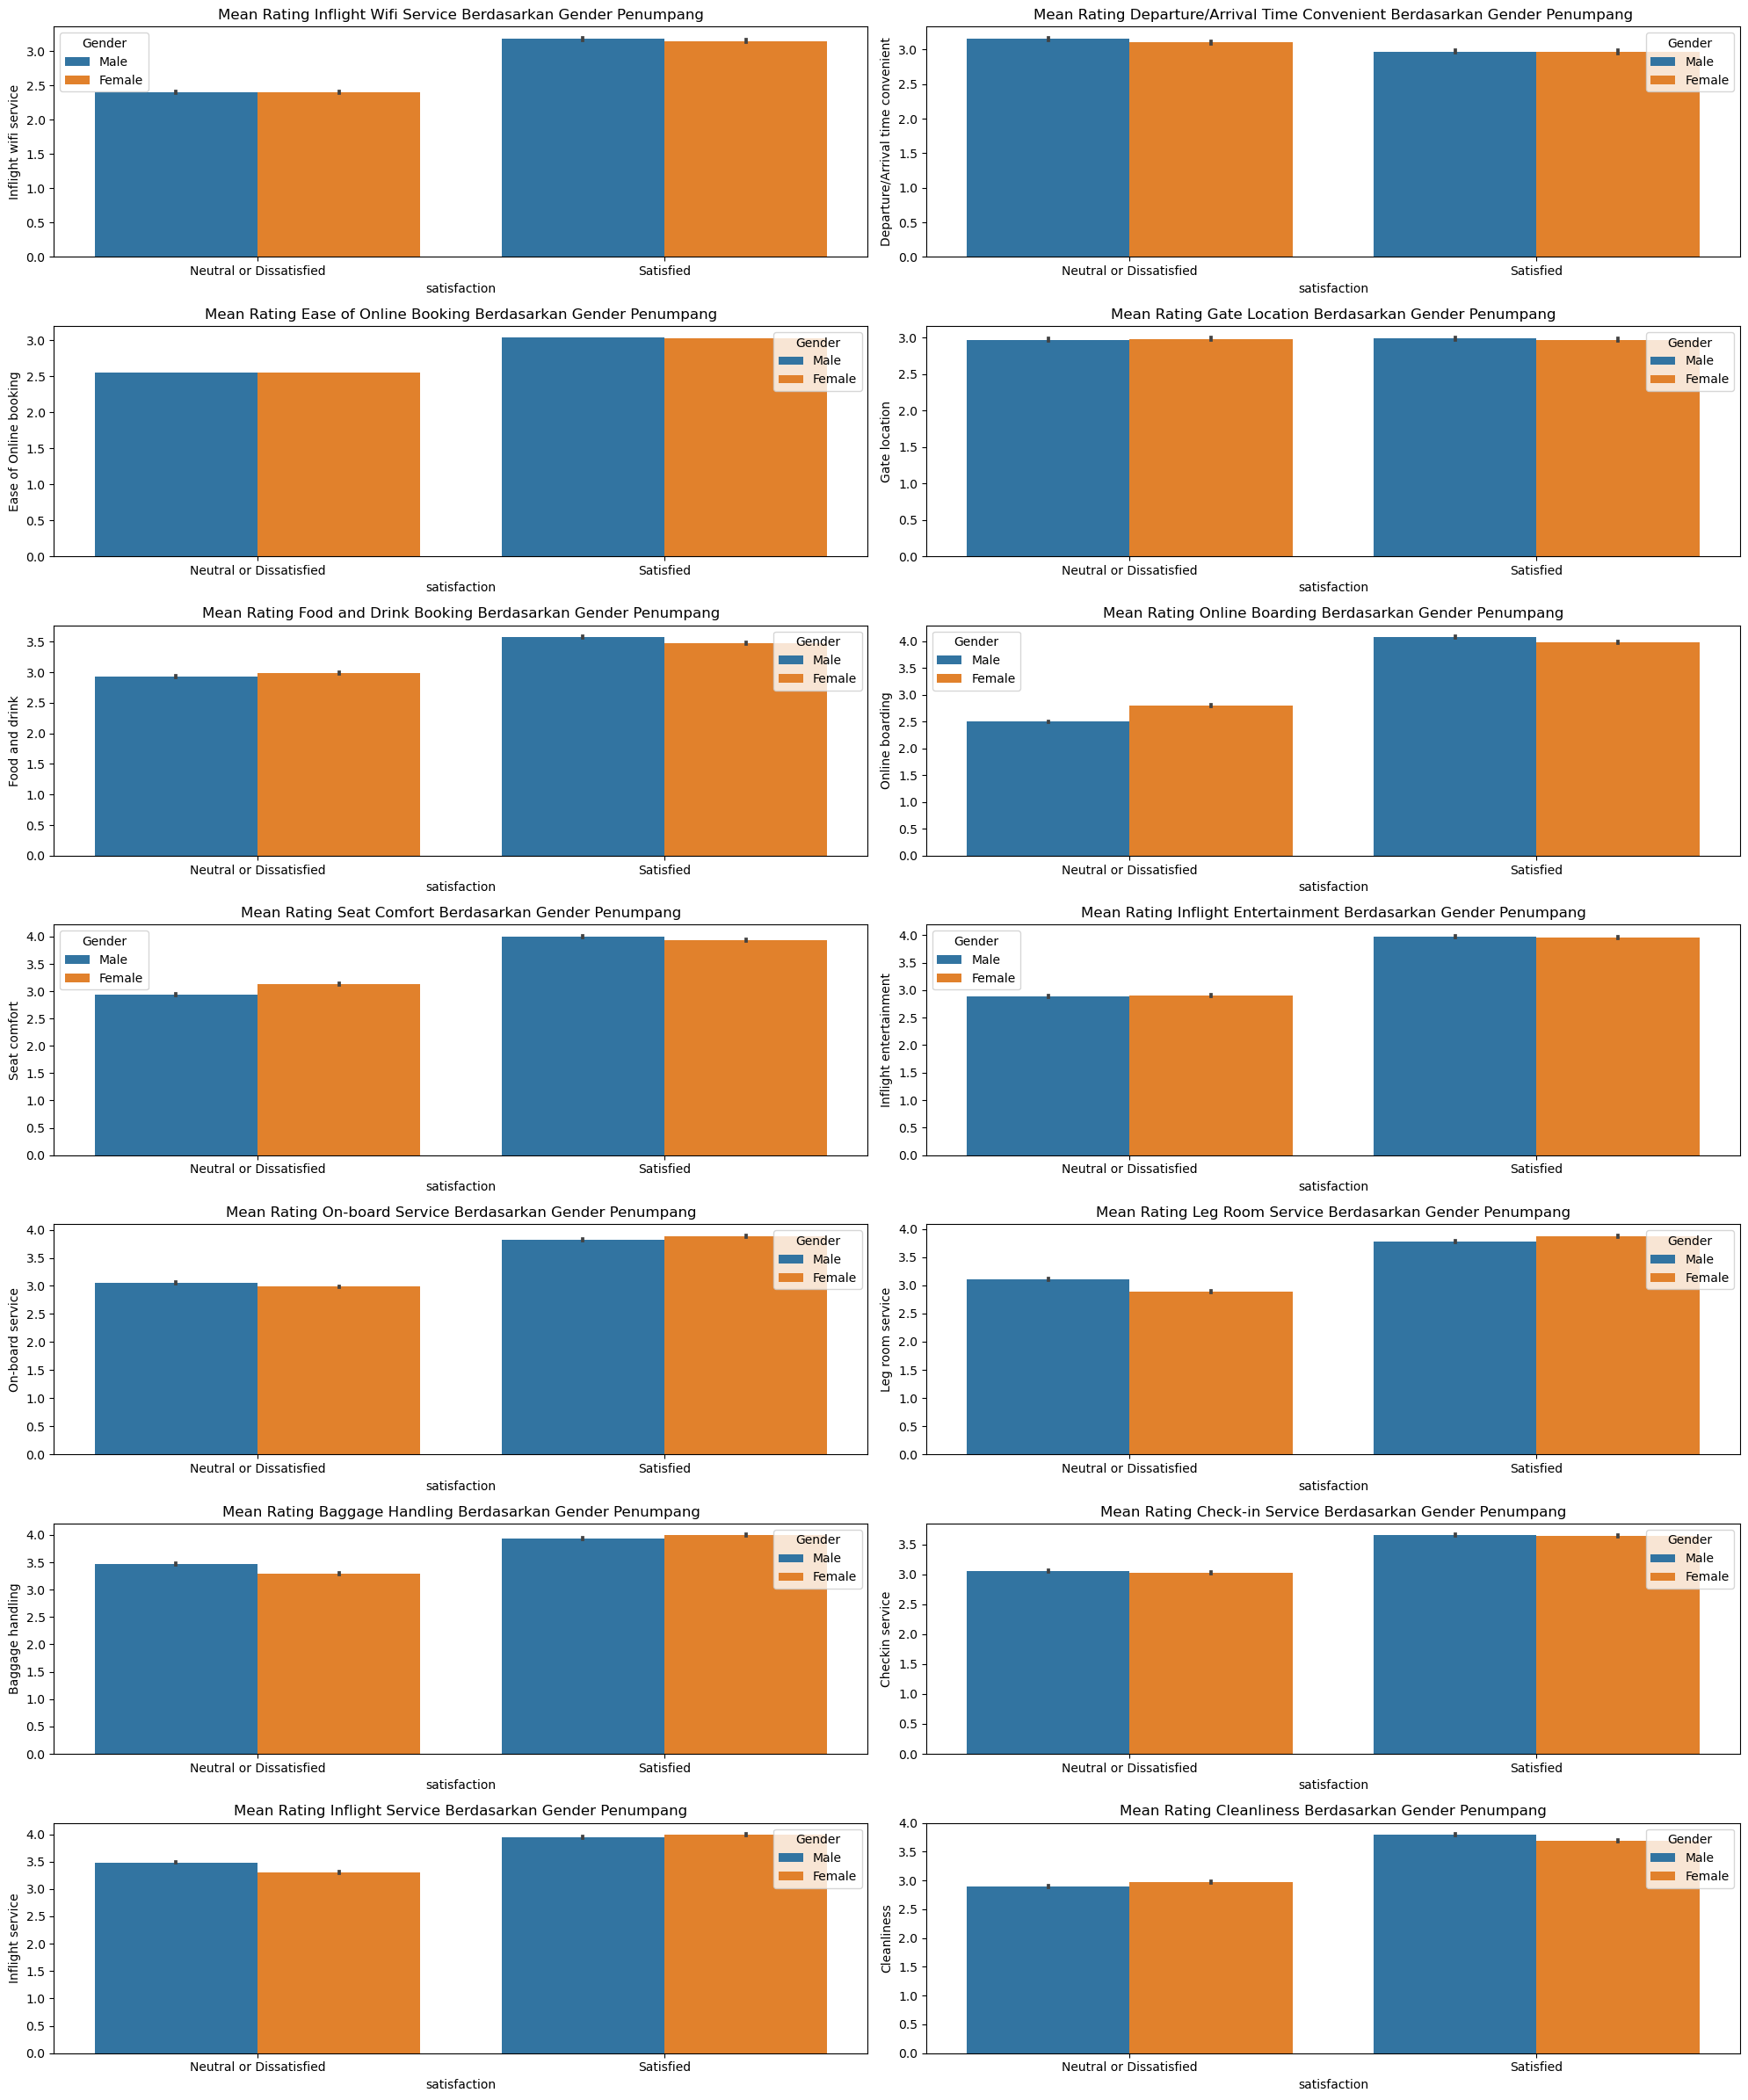

In [79]:
figure,axis=plt.subplots(7,2,figsize=(20,24))

sns.barplot(data=df,y='Inflight wifi service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[0,0]).set_title('Mean Rating Inflight Wifi Service Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Departure/Arrival time convenient',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[0,1]).set_title('Mean Rating Departure/Arrival Time Convenient Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Ease of Online booking',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[1,0],ci=None).set_title('Mean Rating Ease of Online Booking Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Gate location',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[1,1]).set_title('Mean Rating Gate Location Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Food and drink',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[2,0]).set_title('Mean Rating Food and Drink Booking Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Online boarding',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[2,1]).set_title('Mean Rating Online Boarding Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Seat comfort',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[3,0]).set_title('Mean Rating Seat Comfort Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Inflight entertainment',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[3,1]).set_title('Mean Rating Inflight Entertainment Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='On-board service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[4,0]).set_title('Mean Rating On-board Service Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Leg room service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[4,1]).set_title('Mean Rating Leg Room Service Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Baggage handling',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[5,0]).set_title('Mean Rating Baggage Handling Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Checkin service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[5,1]).set_title('Mean Rating Check-in Service Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Inflight service',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[6,0]).set_title('Mean Rating Inflight Service Berdasarkan Gender Penumpang')
sns.barplot(data=df,y='Cleanliness',x='satisfaction',hue='Gender',estimator=np.mean,ax=axis[6,1]).set_title('Mean Rating Cleanliness Berdasarkan Gender Penumpang')

plt.tight_layout()
plt.show()

Secara umum kepuasan pelayanan maskapai penerbangan tidak terlalu dipengaruhi oleh gender penumpang karena tidak terlihat perbedaan yang signifikan antara mean rating pelayanan maskapai penerbangan oleh pria dan wanita.

### 3. Berdasarkan Type of Travel dan Class

Kita akan melihat terlebih dahulu pasar dari penumpang maskapai penerbangan berdasarkan tipe perjalanan penumpang dan class penumpang.

In [322]:
# Jumlah type of travel dan class penumpang
pd.crosstab(df['Type of Travel'],df['Class'])

Class,Business,Eco,Eco Plus
Type of Travel,,,
Business Travel,47508,20257,3890
Personal Travel,2157,26488,3604


In [323]:
# Proporsi type of travel dan class penumpang
pd.crosstab(df['Type of Travel'],df['Class'],normalize='all')

Class,Business,Eco,Eco Plus
Type of Travel,,,
Business Travel,0.45723,0.194959,0.037438
Personal Travel,0.02076,0.254928,0.034686


In [324]:
df_piechart = pd.DataFrame([['Business Travel', 'Business', 47508],
                   ['Business Travel', 'Eco', 20257],
                   ['Business Travel', 'Eco Plus',3890],
                   ['Personal Travel', 'Business',2157],
                   ['Personal Travel', 'Eco',26488],
                   ['Personal Travel', 'Eco Plus',3604]])
df_piechart.columns = ['Type of Travel', 'Class', 'n']

In [325]:
outer = df_piechart.groupby('Type of Travel').sum()

In [326]:
inner = df_piechart.groupby(['Type of Travel', 'Class']).sum()
inner

n
Type of Travel  Class          
Business Travel Business  47508
                Eco       20257
                Eco Plus   3890
Personal Travel Business   2157
                Eco       26488
                Eco Plus   3604

In [327]:
inner_labels = inner.index.get_level_values(1)

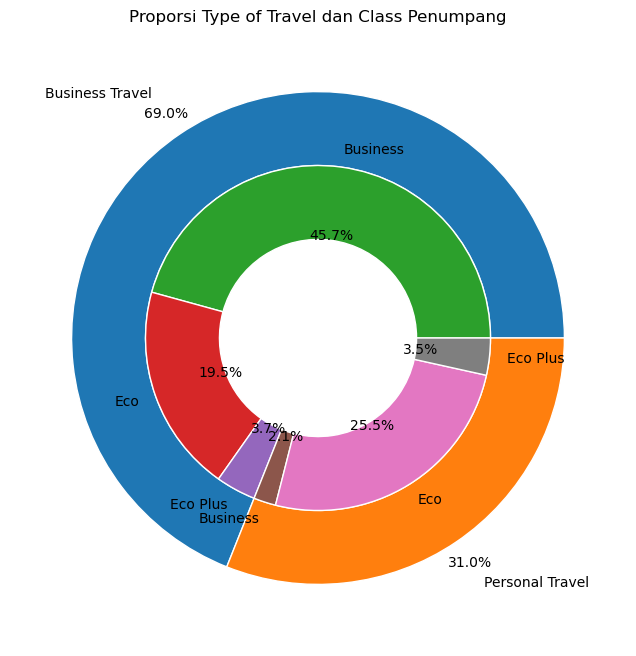

In [162]:
fig, ax = plt.subplots(figsize=(12,8))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       autopct='%1.1f%%',
       pctdistance=1.1, labeldistance=1.2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Proporsi Type of Travel dan Class Penumpang')
plt.show()

Berdasarkan pie chart, 69% penumpang melakukan penerbangan untuk melakukan Business Travel dan 31% penumpang melakukan penerbangan untuk melakukan Personal Travel. 
* Penumpang yang melakukan Business Travel terlihat lebih memilih Class Business sedangkan penumpang yang melakukan Personal Travel terlihat lebih memilih Class Eco. Hal ini dapat disebabkan karena penumpang yang melakukan Business Travel lebih rela untuk mengeluarkan uang lebih demi kenyamanan dan fasilitas premium yang ditawarkan Class Business.
* Terlihat bahwa 3 pasar terbesar maskapai penerbangan berdasarkan type of travel dan class adalah penumpang Class Business yang melakukan Business Travel (45,7%), penumpang Class Eco yang melakukan Personal Travel (25,5%), dan penumpang Class Eco yang melakukan Business Travel (19,5%). 

Sekarang kita akan melihat kepuasan penumpang berdasarkan type of travel dan class penumpang.

In [328]:
pivot_typeoftravel_class=df.pivot_table(values='Gender',index=['satisfaction','Type of Travel'],columns='Class',aggfunc='count')
pivot_typeoftravel_class

Class                                    Business    Eco  Eco Plus
satisfaction            Type of Travel                            
Neutral or Dissatisfied Business Travel     13292  14257      2360
                        Personal Travel      1893  23787      3290
Satisfied               Business Travel     34216   6000      1530
                        Personal Travel       264   2701       314

In [329]:
df_ct_typeoftravelsatisfaction=pd.crosstab(df['Type of Travel'],df['satisfaction'],normalize='index')
df_ct_typeoftravelsatisfaction


satisfaction,Neutral or Dissatisfied,Satisfied
Type of Travel,,
Business Travel,0.417403,0.582597
Personal Travel,0.898322,0.101678


In [552]:
df_ct_typeoftravelsatisfaction2=pd.crosstab(df['Type of Travel'],df['satisfaction'])

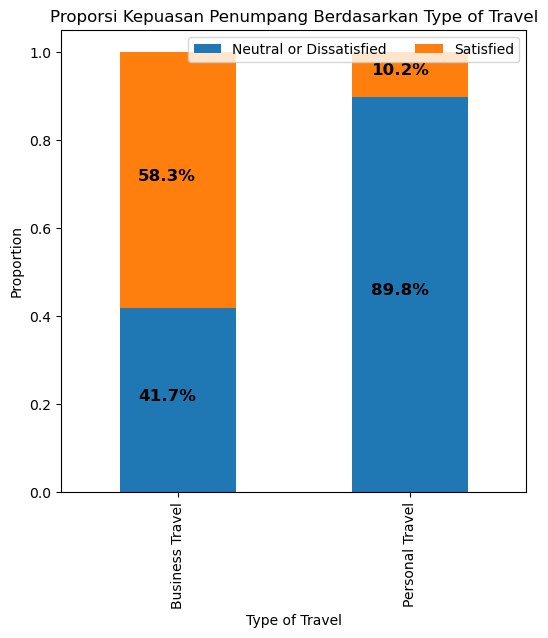

In [553]:
df_ct_typeoftravelsatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Type of Travel")
plt.ylabel("Proportion")


for n, x in enumerate([*df_ct_typeoftravelsatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_typeoftravelsatisfaction.loc[x],
                                   df_ct_typeoftravelsatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proporsi Kepuasan Penumpang Berdasarkan Type of Travel')
plt.show()

Secara umum, penumpang yang melakukan Personal Travel jauh lebih cenderung untuk merasa netral atau tidak puas dibandingkan penumpang yang melakukan Business Travel. Penumpang yang melakukan Personal Travel bahkan memiliki persentase rasa netral atau tidak puas terhadap pelayanan maskapai penerbangan hingga mencapai 90% sehingga kita perlu secara khusus menganalisa lebih lanjut faktor-faktor yang membuat penumpang yang melakukan Personal Travel memiliki tingkat ketidakpuasan yang sangat tinggi.

In [331]:
df_ct_classsatisfaction=pd.crosstab(df['Class'],df['satisfaction'],normalize='index')
df_ct_classsatisfaction

satisfaction,Neutral or Dissatisfied,Satisfied
Class,,
Business,0.305749,0.694251
Eco,0.813862,0.186138
Eco Plus,0.753936,0.246064


In [554]:
df_ct_classsatisfaction2=pd.crosstab(df['Class'],df['satisfaction'])

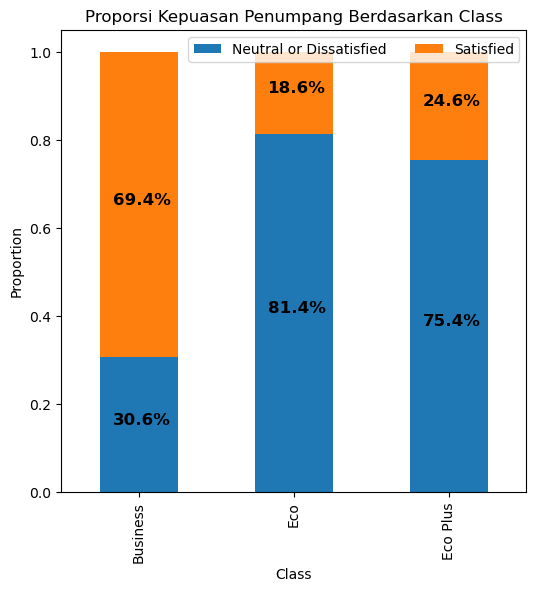

In [555]:
df_ct_classsatisfaction.plot(kind='bar', 
                        stacked=True,
                        figsize=(6, 6))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Class")
plt.ylabel("Proportion")

for n, x in enumerate([*df_ct_classsatisfaction2.index.values]):
    for (proportion, y_loc) in zip(df_ct_classsatisfaction.loc[x],
                                   df_ct_classsatisfaction.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.title('Proporsi Kepuasan Penumpang Berdasarkan Class')
plt.show()

Penumpang yang melakukan perjalanan Personal Travel umumnya lebih memilih untuk menggunakan Class Eco dan Eco Plus sehingga secara umum, penumpang yang menggunakan Class Eco dan Eco Plus lebih cenderung untuk merasa netral atau tidak puas dibandingkan penumpang yang menggunakan Class Business. Maka faktor Class Economy yang umumnya dipilih oleh penumpang yang melakukan Personal Travel merupakan faktor yang menyebabkan tingginya rasa ketidakkepuasan penumpang.

In [333]:
df.pivot_table(values='Gender',index=['satisfaction','Type of Travel'],columns='Class',aggfunc='count')

Class                                    Business    Eco  Eco Plus
satisfaction            Type of Travel                            
Neutral or Dissatisfied Business Travel     13292  14257      2360
                        Personal Travel      1893  23787      3290
Satisfied               Business Travel     34216   6000      1530
                        Personal Travel       264   2701       314

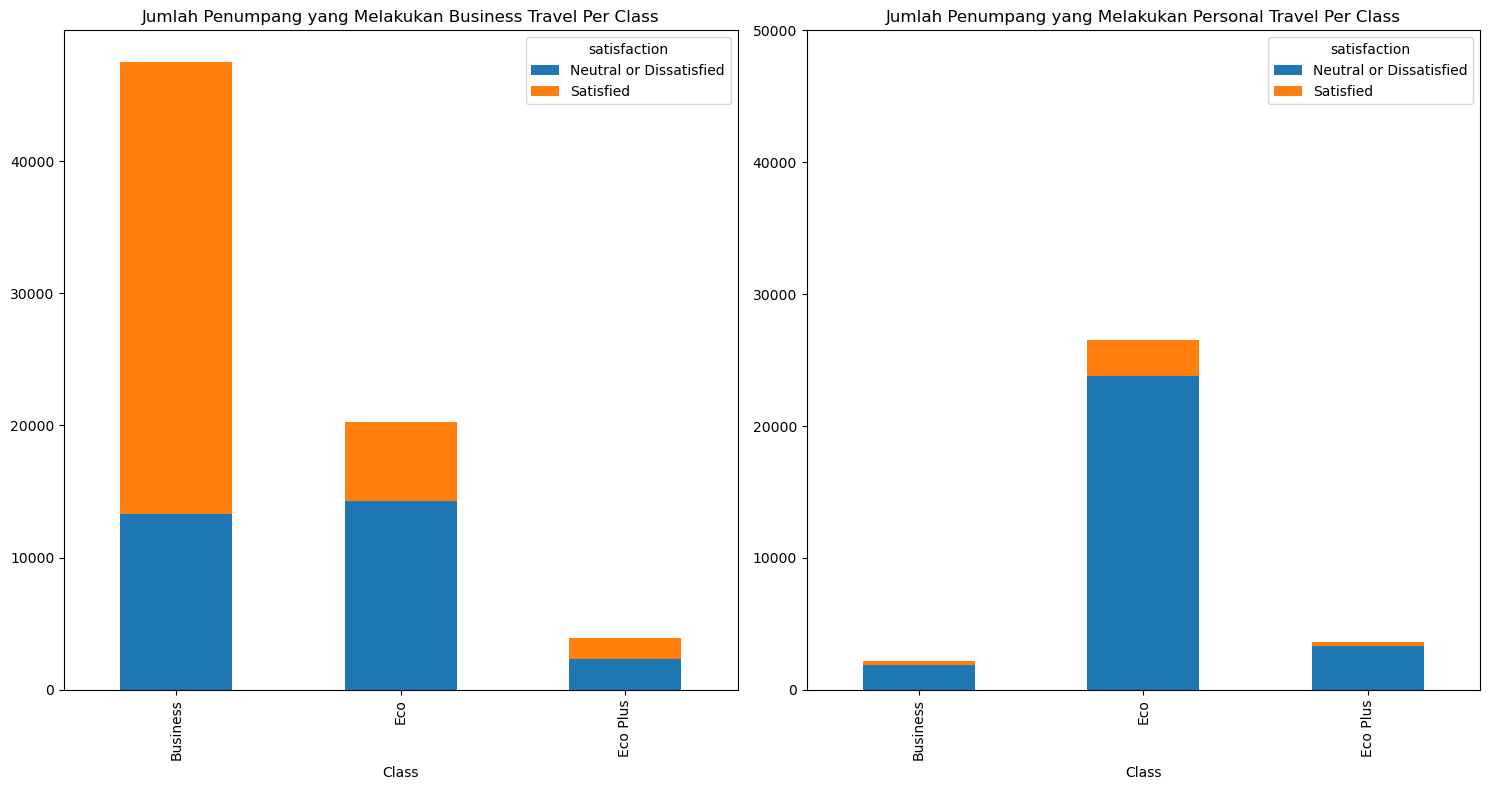

In [514]:
df_plot_business=df[df['Type of Travel']=='Business Travel'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)
df_plot_personal=df[df['Type of Travel']=='Personal Travel'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)

figure,axis=plt.subplots(1,2,figsize=(15,8))

df_plot_business.plot(kind='bar',stacked=True,ax=axis[0]).set_title('Jumlah Penumpang yang Melakukan Business Travel Per Class')
df_plot_personal.plot(kind='bar',stacked=True,ax=axis[1]).set_title('Jumlah Penumpang yang Melakukan Personal Travel Per Class')

plt.ylim(0, 50000)
plt.tight_layout()
plt.show()

* Penumpang yang melakukan Business Travel dengan Class Business yang merupakan pasar penumpang terbesar maskapai penerbangan berdasarkan type of travel dan class, terlihat sudah merasa puas terhadap pelayanan maskapai penerbangan. 
* Namun, penumpang yang melakukan baik Personal Travel maupun Business Travel dengan Class Eco terlihat merasa netral atau tidak puas dengan pelayanan maskapai penerbangan sehingga kita perlu menganalisa lebih lanjut faktor-faktor yang menyebabkan penumpang merasa netral atau tidak puas karena penumpang Class Eco yang melakukan Personal Travel maupun Business Travel merupakan pasar penumpang maskapai penerbangan yang cukup besar (45% dari total penumpang). 

* Selain itu penumpang yang melakukan Business Travel pada Class Economy mayoritas merupakan disloyal customer atau merupakan penumpang yang belum lama memilih maskapai penerbangan tersebut. Sehingga artinya pelayanan baru-baru ini tidak cukup memuaskan bagi penumpang Class Economy yang ingin melakukan perjalanan bisnis. Jika pelayanan tidak diperbaiki, penumpang Class Economy yang ingin melakukan perjalanan bisnis dapat beralih ke maskapai penerbangan lainnya.
* Namun penumpang yang melakukan Personal Travel pada Class Economy mayoritas merupakan loyal customer dan tidak puas terhadap pelayanan maskapai penerbangan. Sehingga artinya walaupun penumpang sudah lama menggunakan maskapai penerbangan dan tidak puas, namun mayoritas mereka tetap memilih untuk menggunakan maskapai penerbangan tersebut. Hal ini bisa disebabkan karena walaupun merasa tidak puas, faktor ekonomi dapat menjadi salah satu penyebab penumpang Class Economy yang ingin melakukan Personal Travel tetap memilih maskapai penerbangan terkait.

In [446]:
survei_class=df.groupby('Class').mean()[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]
survei_class

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Class,,,,,,,,,,,,,,
Business,2.775315,2.905910,2.913964,2.982926,3.323165,3.716541,3.760858,3.635437,3.679472,3.644498,3.842907,3.519178,3.844579,3.477600
Eco,2.675067,3.199123,2.605241,2.971954,3.086277,2.812985,3.138838,3.098256,3.120355,3.085720,3.450551,3.122002,3.463921,3.108097
Eco Plus,2.767948,3.217507,2.661996,2.967574,3.122631,2.889245,3.183747,3.141713,3.047638,3.061382,3.363758,3.017214,3.388444,3.130771


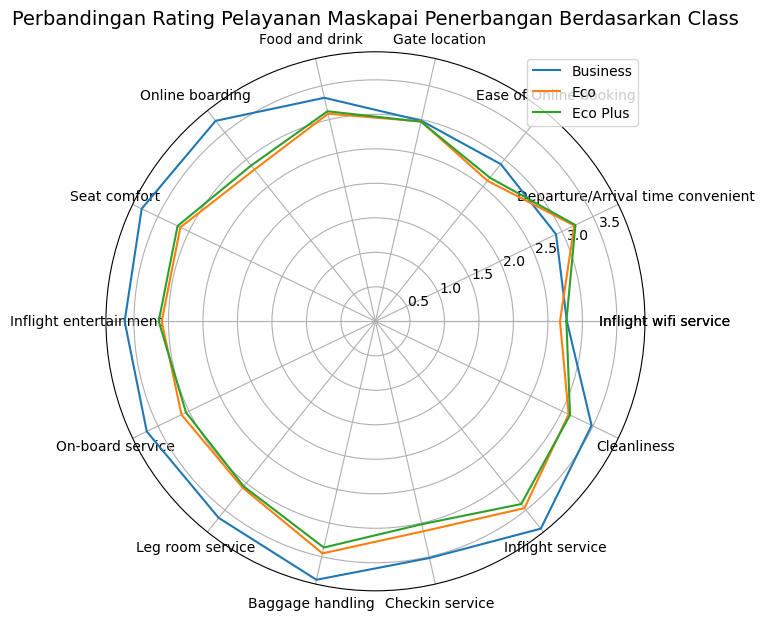

In [447]:
categories = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
categories = [*categories, categories[0]]

# Mean
business = survei_class.loc['Business'].values
eco = survei_class.loc['Eco'].values
ecoplus = survei_class.loc['Eco Plus'].values

business= [*business,business[0]]
eco  = [*eco,eco[0]]
ecoplus  = [*ecoplus,ecoplus[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(business))

plt.figure(figsize=(7, 7))
plt.subplot(polar=True)
plt.plot(label_loc, business, label='Business')
plt.plot(label_loc, eco, label='Eco')
plt.plot(label_loc, ecoplus, label='Eco Plus')
plt.title('Perbandingan Rating Pelayanan Maskapai Penerbangan Berdasarkan Class', size=14)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc=1)
plt.show()

* Penumpang pada Class Business lebih puas pada semua aspek pelayanan dibandingkan Class Economy terkecuali pada aspek kenyamanan waktu kedatangan dan keberangkatan. Hal ini disebabkan karena penumpang pada Class Business mendapatkan fasilitas yang lebih premium yang ditawarkan pada Class Business. 
* Penumpang pada Class Business secara keseluruhan sudah puas terhadap seluruh aspek pelayanan namun aspek yang masih dapat ditingkatkan adalah makanan dan minuman, lokasi gate, kemudahan online booking, dan aspek kenyamanan waktu kedatangan dan keberangkatan, dan layanan wifi di pesawat. Mean aspek kenyamanan waktu kedatangan dan keberangkatan penumpang Class Business bahkan lebih rendah dibandingkan Class Economy dan Economy Plus sehingga hal tersebut mengartikan bahwa delay akan lebih mempengaruhi penumpang Class Business yang mayoritas melakukan perjalanan untuk bekerja.
* Penumpang pada Class Economy dan Class Economy Plus memiliki tingkat kepuasan yang cukup mirip dimana penumpang merasa aspek yang masih dapat ditingkatkan adalah aspek online boarding, layanan inflight wifi, lokasi gate, dan kemudahan online booking. 

### 4. Berdasarkan Usia Penumpang

Text(0.5, 1.0, 'Median Age Berdasarkan Kepuasan Penumpang')

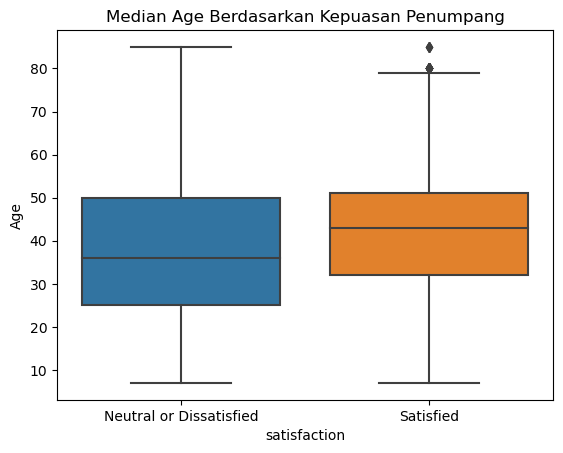

In [189]:
sns.boxplot(data=df,y='Age',x='satisfaction').set_title('Median Age Berdasarkan Kepuasan Penumpang')

In [194]:
df.groupby('satisfaction').median()['Age']

satisfaction
Neutral or Dissatisfied    36.0
Satisfied                  43.0
Name: Age, dtype: float64

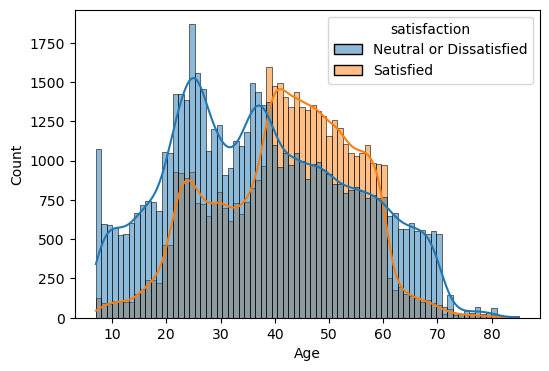

In [184]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Age',hue='satisfaction',kde=True)

plt.show()

Berdasarkan distribusi usia penumpang yang merasa puas maupun netral atau tidak puas, terlihat bahwa penumpang usia muda lebih cenderung untuk merasa netral atau tidak puas dibandingkan penumpang dengan usia lebih tua dimana pada sekitar umur 40 hingga 60 tahun, penumpang lebih merasa puas atas pelayanan maskapai penerbangan. 

Sekarang kita akan menguji secara statistik apakah median usia penumpang yang merasa netral atau tidak puas memang lebih rendah dibandingkan median usia penumpang yang merasa puas

H0: Median usia penumpang yang merasa netral atau tidak puas sama dengan median usia penumpang yang merasa puas  
H1: Median usia penumpang yang merasa netral atau tidak puas lebih rendah dibandingkan dengan median usia penumpang yang merasa puas

In [198]:
# Menggunakan Mann Whitney U yang merupakan uji non parametrik untuk membandingkan median dari 2 populasi independent
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Age'],
df[df['satisfaction']=='Satisfied']['Age'],alternative='less')

MannwhitneyuResult(statistic=1098310812.5, pvalue=0.0)

Karena p-value lebih kecil dari 0.05, maka kita mempunyai cukup bukti untuk menolak H0 dan median usia penumpang yang merasa netral atau tidak puas lebih rendah dibandingkan dengan median usia penumpang yang merasa puas.

Untuk menganalisa lebih lanjut, kita akan membagi penumpang menjadi beberapa kelompok usia sesuai dengan Bappenas yaitu:
* Di bawah 15 tahun: Kelompok usia anak-anak
* 15-24 tahun: Kelompok usia muda
* 25-34 tahun: Kelompok usia pekerja awal
* 35-44 tahun: Kelompok usia paruh baya
* 45-54 tahun: Kelompok usia pra-pensiun
* 55-64 tahun: Kelompok usia pensiun
* 65 tahun ke atas: Kelompok usia lanjut

In [24]:
age=pd.cut(df['Age'], [0, 15, 24, 34, 44, 54, 64, 85])
age.value_counts()

(34, 44]    24132
(44, 54]    21422
(24, 34]    19723
(54, 64]    14064
(15, 24]    13767
(0, 15]      6048
(64, 85]     4748
Name: Age, dtype: int64

In [44]:
df2=df.copy()

In [45]:
# Membuat kolom baru Age Group
df2.loc[df2['Age']<15, 'Age Group'] = 'Anak-Anak'
df2.loc[df2['Age'].between(15,24), 'Age Group'] = 'Usia Muda'
df2.loc[df2['Age'].between(25,34), 'Age Group'] = 'Usia Pekerja Awal'
df2.loc[df2['Age'].between(34,44), 'Age Group'] = 'Usia Paruh Baya'
df2.loc[df2['Age'].between(45,54), 'Age Group'] = 'Usia Pra-pensiun'
df2.loc[df2['Age'].between(55,64), 'Age Group'] = 'Usia Pensiun'
df2.loc[df2['Age']>64, 'Age Group'] = 'Usia Lanjut'

In [46]:
df2['Age Group'].value_counts()

Usia Paruh Baya      25885
Usia Pra-pensiun     21422
Usia Pekerja Awal    17970
Usia Muda            14585
Usia Pensiun         14064
Anak-Anak             5230
Usia Lanjut           4748
Name: Age Group, dtype: int64

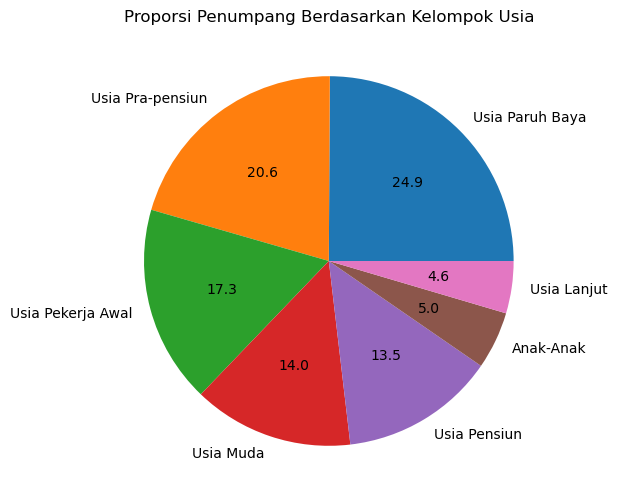

In [29]:
vc=df2['Age Group'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(vc,labels=vc.index,
    autopct='%.1f')
plt.title('Proporsi Penumpang Berdasarkan Kelompok Usia')
plt.show()

Dapat disimpulkan bahwa pasar terbesar maskapai penerbangan berdasarkan kelompok usia adalah usia paruh baya, usia pra-pensiun, usia pekerja awal, usia muda, dan usia pensiun sedangkan anak-anak dan usia lanjut hanya memiliki proporsi yang kecil pada pasar penumpang maskapai penerbangan. Maka kita akan melakukan analisa untuk mencari aspek yang mempengaruhi kepuasan penumpang berdasarkan kelompok usianya.

In [47]:
pd.crosstab(df2['Age Group'],df2['satisfaction'],normalize='index')

satisfaction,Neutral or Dissatisfied,Satisfied
Age Group,,
Anak-Anak,0.861377,0.138623
Usia Lanjut,0.815712,0.184288
Usia Muda,0.678094,0.321906
Usia Paruh Baya,0.504848,0.495152
Usia Pekerja Awal,0.632165,0.367835
Usia Pensiun,0.509315,0.490685
Usia Pra-pensiun,0.421062,0.578938


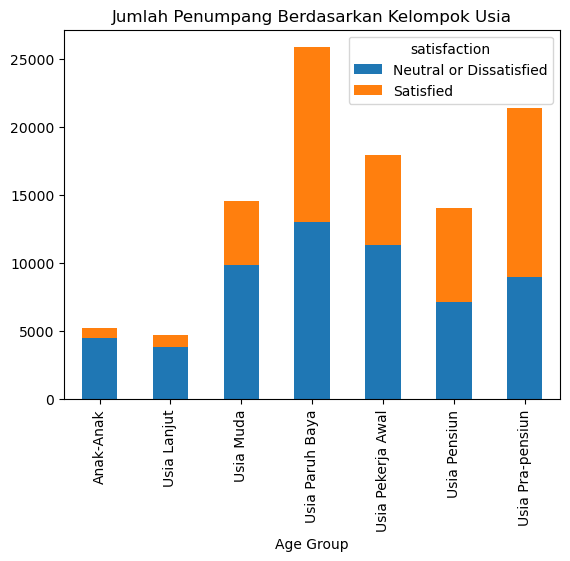

In [49]:
df_plot=df2.groupby(['Age Group','satisfaction']).size().reset_index().pivot(columns='satisfaction', index='Age Group', values=0)
   
df_plot.plot(kind='bar', stacked=True)

plt.title('Jumlah Penumpang Berdasarkan Kelompok Usia')
plt.show()

Berdasarkan barplot, hanya kelompok usia pra-pensiun, kelompok usia pensiun, dan kelompok usia paruh baya yang mayoritas sudah merasa puas sedangkan kelompok usia lainnya mayoritas masih merasa netral atau tidak puas terhadap pelayanan maskapai penerbangan. Terlihat bahwa kelompok usia muda dan kelompok usia pekerja awal mayoritas masih merasa netral atau tidak puas (67,8% kelompok usia muda dan 63,2% kelompok usia pekerja awal masih merasa netral atau tidak puas) sehingga kita akan menganalisa lebih lanjut faktor-faktor yang menyebabkan kedua kelompok usia tersebut merasa netral atau tidak puas.

In [461]:
survei_agegroup=df2.groupby('Age Group').mean()[['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']]
survei_agegroup

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Age Group,,,,,,,,,,,,,,
Anak-Anak,2.552008,3.397132,2.560994,2.945889,2.990249,2.568834,2.953346,3.018164,3.224283,3.204207,3.666539,3.204589,3.691778,3.005736
Usia Lanjut,2.570556,3.357624,2.639217,2.933235,3.092460,3.145535,3.351516,3.078770,3.111626,2.942291,3.277591,3.136268,3.304760,3.088037
Usia Muda,2.719026,2.897635,2.728420,2.964415,3.137813,2.836202,3.089133,3.153445,3.231745,3.199246,3.692424,3.227083,3.692355,3.153720
Usia Paruh Baya,2.787831,3.018505,2.795905,2.986517,3.206181,3.347344,3.519413,3.440139,3.453583,3.453467,3.644350,3.319297,3.649063,3.313038
Usia Pekerja Awal,2.667446,2.951363,2.715136,2.987201,3.251252,2.959599,3.236283,3.262771,3.240234,3.221035,3.653200,3.227379,3.676516,3.263996
Usia Pensiun,2.726607,3.159059,2.768842,2.961035,3.216226,3.553541,3.666880,3.448023,3.465301,3.413183,3.581271,3.365472,3.580418,3.356371
Usia Pra-pensiun,2.799552,3.099944,2.830268,2.992718,3.266595,3.649706,3.740360,3.564420,3.562226,3.525394,3.660769,3.424657,3.665624,3.429652


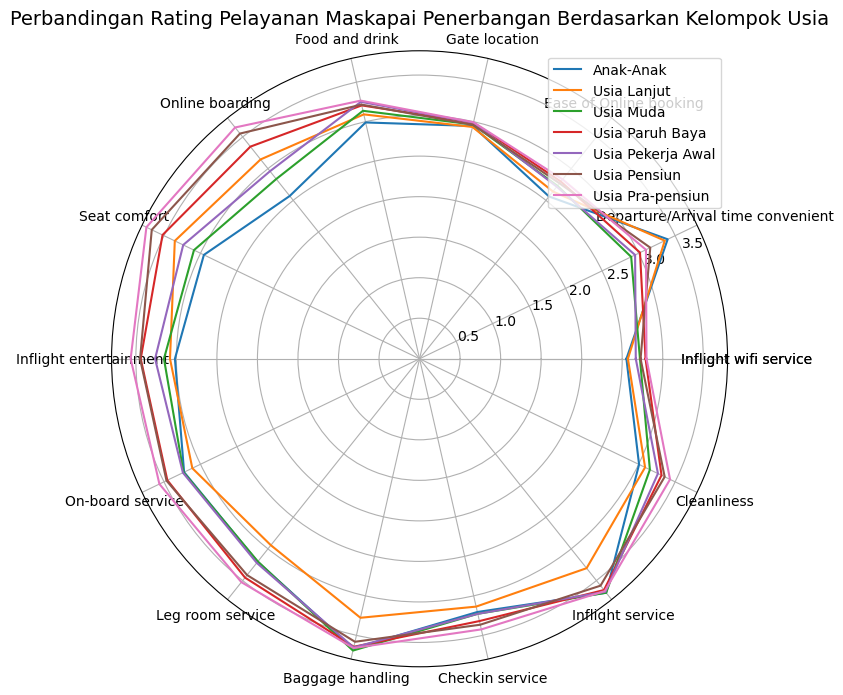

In [462]:
categories = ['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
categories = [*categories, categories[0]]

# Mean
anakanak = survei_agegroup.loc['Anak-Anak'].values
lanjut = survei_agegroup.loc['Usia Lanjut'].values
muda = survei_agegroup.loc['Usia Muda'].values
paruhbaya = survei_agegroup.loc['Usia Paruh Baya'].values
pekerjaawal = survei_agegroup.loc['Usia Pekerja Awal'].values
pensiun = survei_agegroup.loc['Usia Pensiun'].values
prapensiun = survei_agegroup.loc['Usia Pra-pensiun'].values

anakanak=[*anakanak,anakanak[0]]
lanjut=[*lanjut,lanjut[0]]
muda=[*muda,muda[0]]
paruhbaya=[*paruhbaya,paruhbaya[0]]
pekerjaawal=[*pekerjaawal,pekerjaawal[0]]
pensiun=[*pensiun,pensiun[0]]
prapensiun=[*prapensiun,prapensiun[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(anakanak))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc, anakanak, label='Anak-Anak')
plt.plot(label_loc, lanjut, label='Usia Lanjut')
plt.plot(label_loc, muda, label='Usia Muda')
plt.plot(label_loc, paruhbaya, label='Usia Paruh Baya')
plt.plot(label_loc, pekerjaawal, label='Usia Pekerja Awal')
plt.plot(label_loc, pensiun, label='Usia Pensiun')
plt.plot(label_loc, prapensiun, label='Usia Pra-pensiun')
plt.title('Perbandingan Rating Pelayanan Maskapai Penerbangan Berdasarkan Kelompok Usia', size=14)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend(loc=1)
plt.show()

* Secara keseluruhan aspek yang masih dirasa kurang oleh semua kelompok usia adalah layanan wifi di pesawat, lokasi gate, dan kemudahan online booking
* Aspek yang dirasa cukup namun masih dapat ditingkatkan oleh semua kelompok usia adalah makanan dan minuman dan kenyamanan waktu kedatangan dan keberangkatan (terutama bagi penumpang usia produktif bekerja)
* Aspek yang paling mempengaruhi kelompok usia muda untuk merasa netral atau tidak puas terhadap kepuasaan secara keseluruhan adalah kenyamanan waktu keberangkatan dan kedatangan sedangkan aspek yang paling mempengaruhi kelompok usia pekerja awal untuk merasa netral atau tidak puas terhadap kepuasaan secara keseluruhan adalah layanan wifi di pesawat. Dapat disimpulkan bahwa bagi kelompok usia muda dan usia pekerja awal yang merupakan remaja atau dewasa awal, ketepatan waktu serta layanan wifi dalam pesawat merupakan hal yang sangat penting bagi kebutuhan mereka (terkait untuk kepentingan pendidikan atau kepentingan bekerja penumpang)



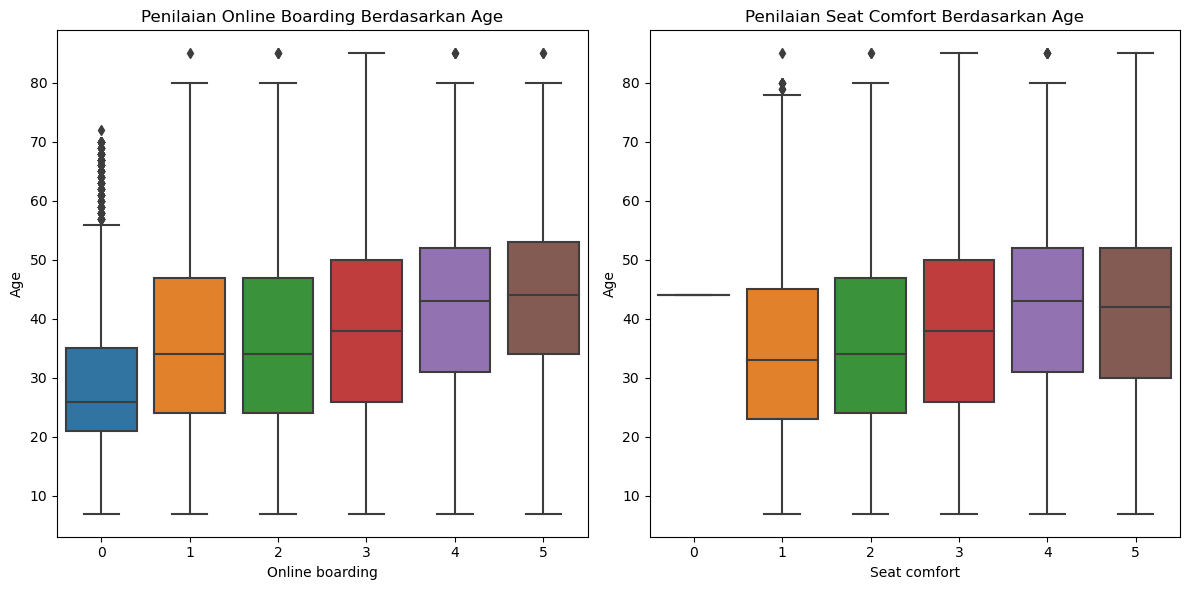

In [70]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Age',x='Online boarding',ax=axis[0]).set_title('Penilaian Online Boarding Berdasarkan Age')
sns.boxplot(data=df,y='Age',x='Seat comfort',ax=axis[1]).set_title('Penilaian Seat Comfort Berdasarkan Age')

plt.tight_layout()
plt.show()

Selain itu, penumpang yang memiliki usia lebih tua cenderung memberikan penilaian pada online boarding dan kenyamanan kursi yang lebih tinggi sehingga dapat disimpulkan bahwa penting bagi maskapai penerbangan untuk memastikan kemudahan online boarding dan kenyamanan kursi terutama bagi penumpang yang lebih tua.

### 5. Berdasarkan Flight Distance

Text(0.5, 1.0, 'Median Flight Distance Berdasarkan Kepuasan Penumpang')

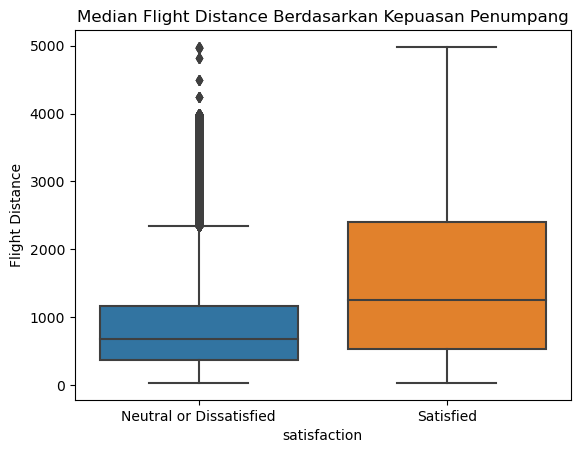

In [190]:
sns.boxplot(data=df,y='Flight Distance',x='satisfaction').set_title('Median Flight Distance Berdasarkan Kepuasan Penumpang')

In [192]:
df.groupby('satisfaction').median()['Flight Distance']

satisfaction
Neutral or Dissatisfied     671.0
Satisfied                  1250.0
Name: Flight Distance, dtype: float64

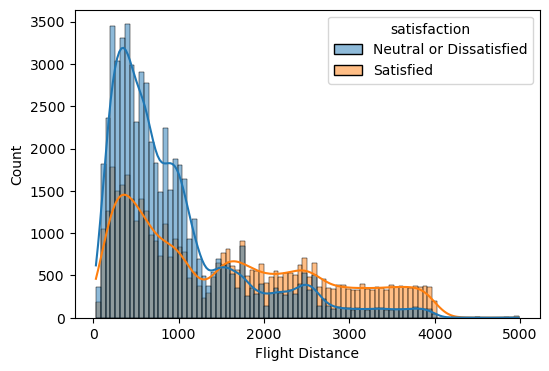

In [191]:
plt.figure(figsize=(6,4))
sns.histplot(data=df,x='Flight Distance',hue='satisfaction',kde=True)

plt.show()

Berdasarkan distribusi jarak perjalanan penumpang yang merasa puas maupun netral atau tidak puas, terlihat bahwa penumpang yang melakukan perjalanan tidak terlalu jauh lebih cenderung untuk merasa netral atau tidak puas dibandingkan penumpang yang melakukan perjalanan lebih jauh. Berdasarkan plot distribusi jarak perjalanan, penumpang yang melakukan perjalanan lebih dari sekitar 1400 miles cenderung lebih merasa puas dibandingkan penumpang yang melakukan perjalanan kurang dari sekitar 1400 miles. 

Sekarang kita akan menguji secara statistik apakah median jarak perjalanan penumpang yang merasa netral atau tidak puas memang lebih rendah dibandingkan median jarak perjalanan penumpang yang merasa puas.

H0: Median jarak perjalanan penumpang yang merasa netral atau tidak puas sama dengan median jarak perjalanan penumpang yang merasa puas  
H1: Median jarak perjalanan penumpang yang merasa netral atau tidak puas lebih rendah dibandingkan median jarak perjalanan penumpang yang merasa puas

In [197]:
# Menggunakan Mann Whitney U yang merupakan uji non parametrik untuk membandingkan median dari 2 populasi independent
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Flight Distance'],
df[df['satisfaction']=='Satisfied']['Flight Distance'],alternative='less')

MannwhitneyuResult(statistic=928190637.5, pvalue=0.0)

Karena p-value lebih kecil dari 0.05, maka kita mempunyai cukup bukti untuk menolak H0 dan median jarak perjalananan penumpang yang merasa netral atau tidak puas lebih rendah dibandingkan dengan median jarak perjalanan penumpang yang merasa puas.

 Berdasarkan plot distribusi jarak perjalanan, penumpang yang melakukan perjalanan lebih dari 1400 miles cenderung lebih merasa puas dibandingkan penumpang yang melakukan perjalanan kurang dari 1400 miles. Maka untuk menganalisa lebih lanjut, kita akan membagi jarak perjalanan menjadi 2 kategori yaitu jarak dekat bagi penumpang yang melakukan perjalanan kurang dari 1400 miles dan jarak jauh bagi penumpang yang melakukan perjalanan lebih dari 1400 miles.

In [556]:
df3=df.copy()

In [557]:
# Membuat kolom baru Distance Group
df3.loc[df3['Flight Distance']<=1400, 'Distance Group'] = 'Jarak Dekat'
df3.loc[df2['Flight Distance']>1400, 'Distance Group'] = 'Jarak Jauh'


In [558]:
# Jumlah distance group dan class penumpang
pd.crosstab(df3['Distance Group'],df3['Class'])

Class,Business,Eco,Eco Plus
Distance Group,,,
Jarak Dekat,22284,41593,6576
Jarak Jauh,27381,5152,918


In [559]:
df_piechart2 = pd.DataFrame([['Jarak Dekat','Business', 22284],
                   ['Jarak Dekat','Eco', 41593],
                   ['Jarak Dekat','Eco Plus', 6576],
                   ['Jarak Jauh','Business', 27381],
                   ['Jarak Jauh','Eco', 5152],
                   ['Jarak Jauh','Eco Plus', 918]])
df_piechart2.columns = ['Distance Group','Class', 'n']

In [560]:
outer2 = df_piechart2.groupby('Distance Group').sum()

inner2 = df_piechart2.groupby(['Distance Group', 'Class']).sum()

inner_labels2 = inner2.index.get_level_values(1)
inner2

n
Distance Group Class          
Jarak Dekat    Business  22284
               Eco       41593
               Eco Plus   6576
Jarak Jauh     Business  27381
               Eco        5152
               Eco Plus    918

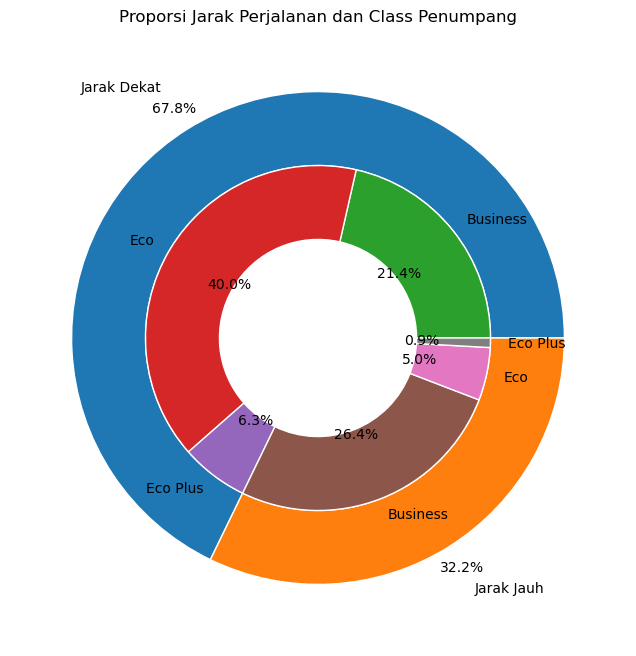

In [561]:
fig, ax = plt.subplots(figsize=(12,8))
size = 0.3

ax.pie(outer2.values.flatten(), radius=1,
       labels=outer2.index,
       autopct='%1.1f%%',
       pctdistance=1.1, labeldistance=1.2,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner2.values.flatten(), radius=1-size, 
       labels = inner_labels2,
       autopct='%1.1f%%',
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='Proporsi Jarak Perjalanan dan Class Penumpang')
plt.show()

* Penumpang yang melakukan perjalanan diatas 1400 miles atau dapat digolongkan sebagai perjalanan jarak jauh lebih memilih untuk menggunakan Class Business. Dapat disimpulkan bahwa penumpang lebih memilih untuk menggunakan Class Business untuk mendapatkan service dan kenyamanan lebih terutama untuk perjalanan yang memakan waktu lebih lama. 
* Sebesar 68% penerbangan yang dilakukan maskapai penerbangan merupakan perjalanan jarak dekat. Mayoritas penumpang yang melakukan perjalanan dibawah 1400 miles atau dapat digolongkan sebagai perjalanan jarak dekat merupakan penumpang Class Economy. 

In [562]:
df_plot_jauh=df3[df3['Distance Group']=='Jarak Jauh'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)
df_plot_dekat=df3[df3['Distance Group']=='Jarak Dekat'].groupby(['satisfaction','Class']).size().reset_index().pivot(columns='satisfaction', index='Class', values=0)


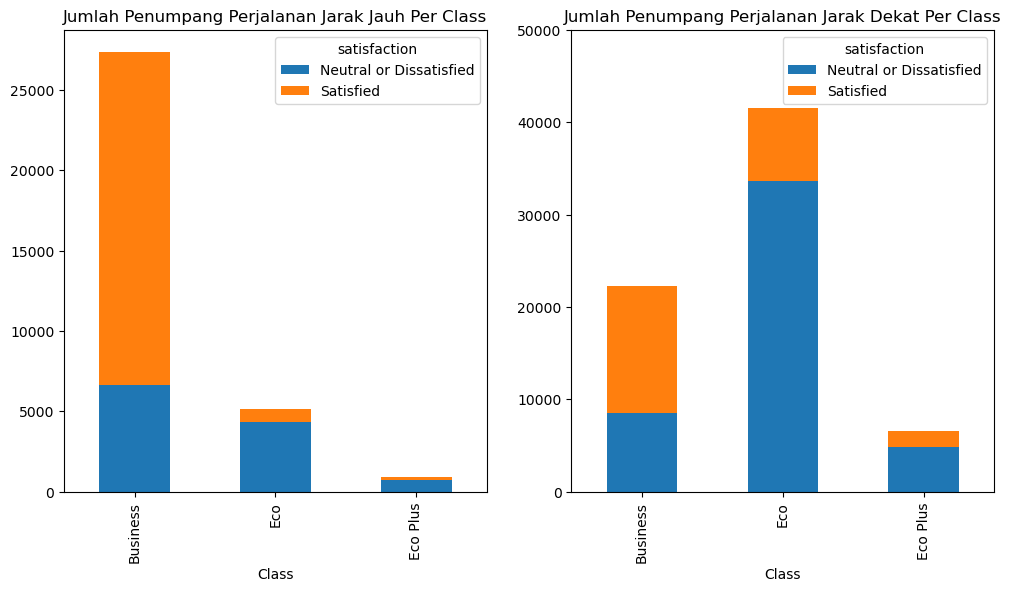

In [563]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

df_plot_jauh.plot(kind='bar',stacked=True,ax=axis[0]).set_title('Jumlah Penumpang Perjalanan Jarak Jauh Per Class')
df_plot_dekat.plot(kind='bar',stacked=True,ax=axis[1]).set_title('Jumlah Penumpang Perjalanan Jarak Dekat Per Class')

plt.ylim(0, 50000)
plt.show()

Terlihat bahwa jumlah penumpang perjalanan jarak dekat yang merasa netral atau tidak puas terhadap pelayanan maskapai perjalanan pada Class Eco sangat tinggi. Maka dapat disimpulkan bahwa faktor Class yaitu Class Economy yang seringkali menjadi pilihan bagi penumpang yang bepergian hanya pada jarak dekat merupakan faktor penyebab tingginya tingkat ketidakpuasan pada penumpang yang memiliki perjalanan jarak dekat.

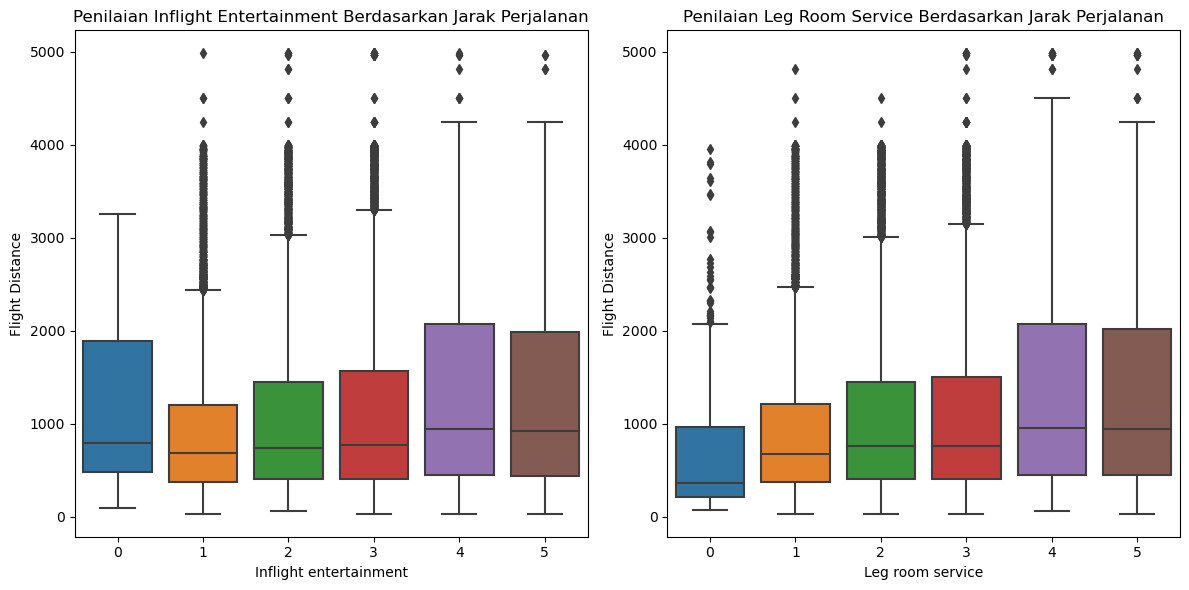

In [479]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Flight Distance',x='Inflight entertainment',ax=axis[0]).set_title('Penilaian Inflight Entertainment Berdasarkan Jarak Perjalanan')
sns.boxplot(data=df,y='Flight Distance',x='Leg room service',ax=axis[1]).set_title('Penilaian Leg Room Service Berdasarkan Jarak Perjalanan')

plt.tight_layout()
plt.show()

Selain itu, penumpang yang memiliki jarak perjalanan semakin jauh cenderung memberikan penilaian pada inflight entertainment dan ruang kursi yang lebih tinggi sehingga dapat disimpulkan bahwa penting bagi maskapai penerbangan untuk menyediakan inflight entertainment dan ruang kursi yang memadai terutama bagi penerbangan jarak jauh.

### 6. Berdasarkan Departure Delay in Minutes dan Arrival Delay in Minutes


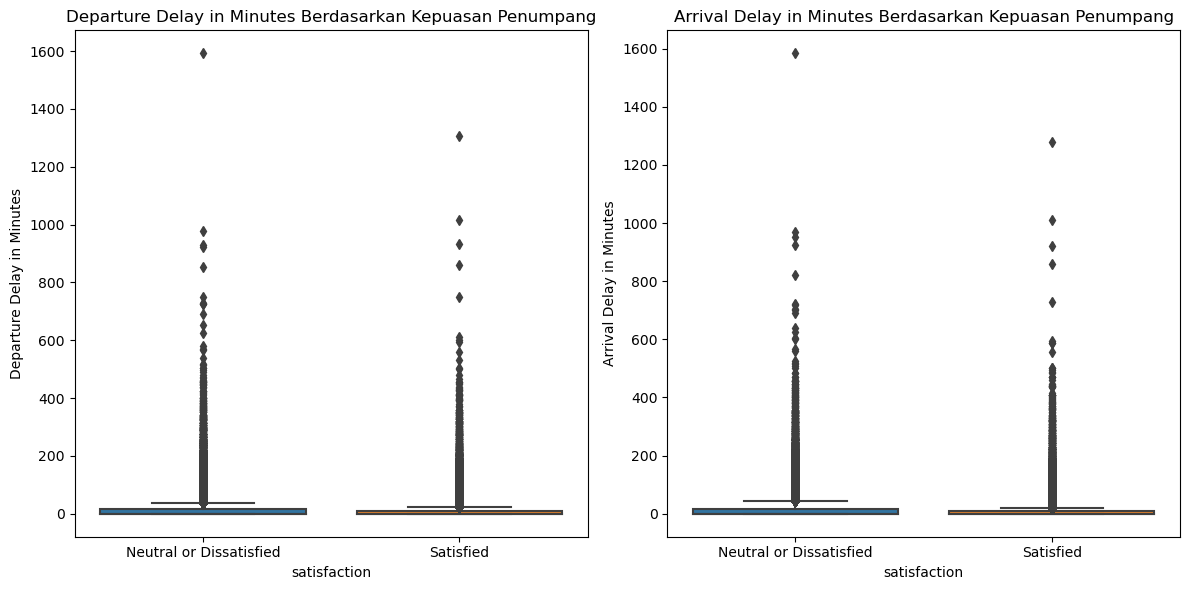

In [72]:
figure,axis=plt.subplots(1,2,figsize=(12,6))

sns.boxplot(data=df,y='Departure Delay in Minutes',x='satisfaction',ax=axis[0]).set_title('Departure Delay in Minutes Berdasarkan Kepuasan Penumpang')
sns.boxplot(data=df,y='Arrival Delay in Minutes',x='satisfaction',ax=axis[1]).set_title('Arrival Delay in Minutes Berdasarkan Kepuasan Penumpang')

plt.tight_layout()
plt.show()

In [262]:
df.groupby('satisfaction').median()['Departure Delay in Minutes']

satisfaction
Neutral or Dissatisfied    0.0
Satisfied                  0.0
Name: Departure Delay in Minutes, dtype: float64

In [263]:
df.groupby('satisfaction').median()['Arrival Delay in Minutes']

satisfaction
Neutral or Dissatisfied    0.0
Satisfied                  0.0
Name: Arrival Delay in Minutes, dtype: float64

Berdasarkan boxplot diatas, median lama delay keberangkatan maupun kedatangan penumpang yang merasa netral atau tidak puas tidak memiliki perbedaan yang signifikan dengan median lama delay keberangkatan maupun kedatangan penumpang yang merasa puas.

Sekarang kita akan menguji secara statistik apakah median lama delay keberangkatan penumpang yang merasa netral atau tidak puas kurang lebih sama dengan median median lama delay keberangkatan penumpang yang merasa puas.

H0: Median median lama delay keberangkatan penumpang yang merasa netral atau tidak puas sama dengan median median lama delay keberangkatan penumpang yang merasa puas  
H1: Median median lama delay keberangkatan penumpang yang merasa netral atau tidak puas lebih rendah dibandingkan median lama delay keberangkatan penumpangyang merasa puas

In [253]:
# Menggunakan Mann Whitney U yang merupakan uji non parametrik untuk membandingkan median dari 2 populasi independent
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Departure Delay in Minutes'],
df[df['satisfaction']=='Satisfied']['Departure Delay in Minutes'],alternative='less')

MannwhitneyuResult(statistic=1420483950.0, pvalue=1.0)

In [255]:
# Menggunakan Mann Whitney U yang merupakan uji non parametrik untuk membandingkan median dari 2 populasi independent
from scipy.stats import mannwhitneyu
mannwhitneyu(df[df['satisfaction']=='Neutral or Dissatisfied']['Arrival Delay in Minutes'],
df[df['satisfaction']=='Satisfied']['Arrival Delay in Minutes'],alternative='less')

MannwhitneyuResult(statistic=1465830841.5, pvalue=1.0)

Karena kedua p-value lebih besar dari 0.05, maka kita tidak mempunyai cukup bukti untuk menolak H0 dan median lama delay keberangkatan dan kedatangan penumpang yang merasa netral atau tidak puas tidak lebih rendah atau kurang lebih sama dengan median lama delay keberangkatan dan kedatangan penumpang yang merasa puas.

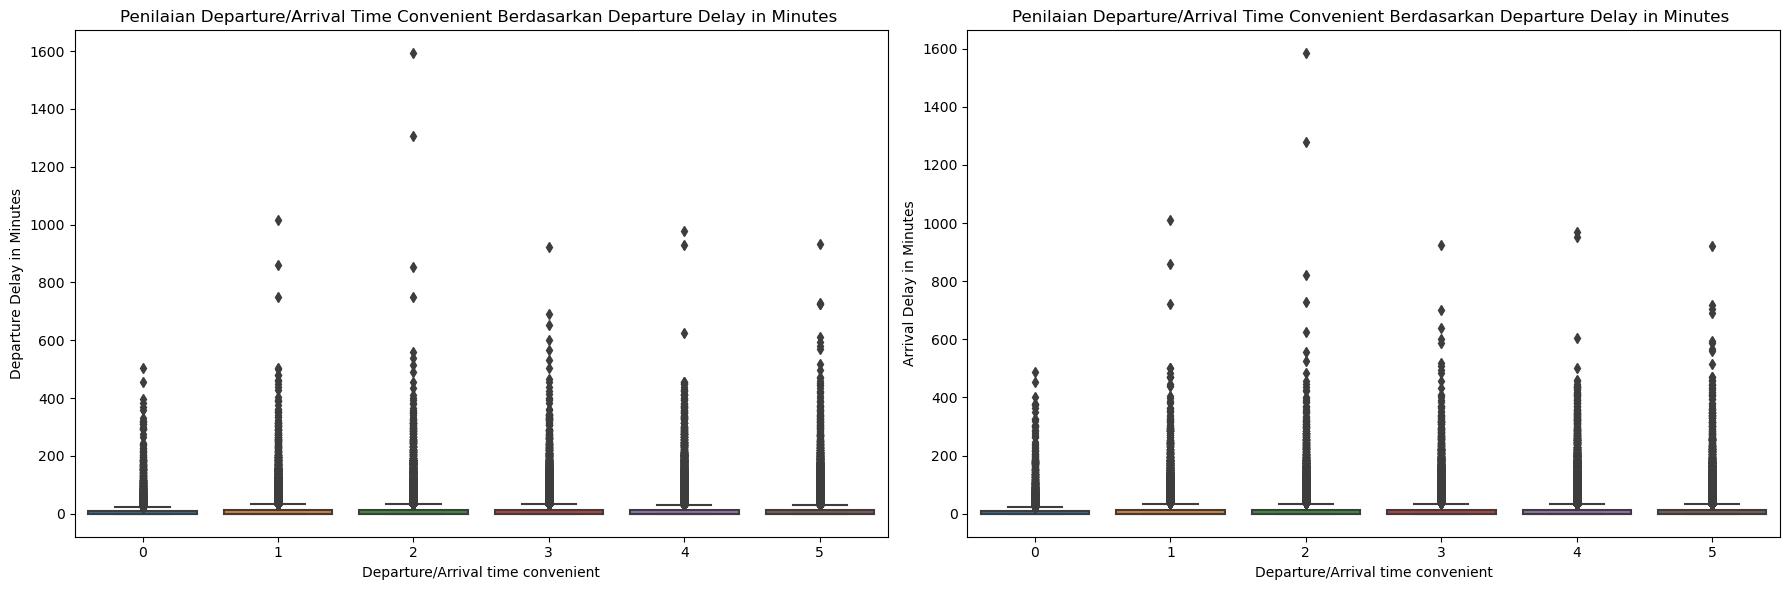

In [73]:
figure,axis=plt.subplots(1,2,figsize=(18,6))

sns.boxplot(data=df,y='Departure Delay in Minutes',x='Departure/Arrival time convenient',ax=axis[0]).set_title('Penilaian Departure/Arrival Time Convenient Berdasarkan Departure Delay in Minutes ')
sns.boxplot(data=df,y='Arrival Delay in Minutes',x='Departure/Arrival time convenient',ax=axis[1]).set_title('Penilaian Departure/Arrival Time Convenient Berdasarkan Departure Delay in Minutes ')

plt.tight_layout()
plt.show()

Tidak terdapat perbedaan rating yang diberikan oleh penumpang berdasarkan lama delay keberangkatan dan kedatangan pesawat. Maka dapat disimpulkan bahwa lama delay keberangkatan dan kedatangan tidak mempengaruhi penilaian kenyamanan waktu keberangkatan dan kedatangan serta kepuasan penumpang terhadap pelayanan maskapai penerbangan.

# Kesimpulan

Maka jawaban dari pernyataan masalah yang ingin dijawab adalah sebagai berikut:

1. Apakah penumpang maskapai penerbangan merasa puas atau tidak puas terhadap pelayanan maskapai penerbangan tersebut?  

Secara keseluruhan, mayoritas penumpang (56,7%) merasa netral atau tidak puas terhadap layanan maskapai penerbangan sehingga penting untuk mengetahui faktor-faktor yang mempengaruhi kepuasan penumpang terkait pelayanan maskapai penerbangan.

2. Apa faktor-faktor yang dapat mempengaruhi kepuasaan penumpang terkait pelayanan penerbangan?

**Berdasarkan Gender**  
* Gender penumpang tidak terlalu mempengaruhi kepuasan penumpang  akan pelayanan maskapai penerbangan.

**Berdasarkan Type of Travel dan Class**
- Penumpang yang melakukan Business Travel lebih memilih Class Business sedangkan penumpang yang melakukan Personal Travel lebih memilih Class Eco dan Eco Plus.
- Class dan type of travel mempengaruhi kepuasan penumpang  akan pelayanan maskapai penerbangan dimana faktor Class Economy yang umumnya dipilih oleh penumpang yang melakukan Personal Travel merupakan faktor yang menyebabkan tingginya rasa ketidakkepuasan penumpang.
- Penumpang pada Class Business lebih puas pada semua aspek pelayanan dibandingkan Class Economy terkecuali pada aspek kenyamanan waktu kedatangan dan keberangkatan karena penumpang pada Class Business mendapatkan fasilitas yang lebih premium. 
- Aspek kenyamanan waktu kedatangan dan keberangkatan lebih mempengaruhi penumpang Class Business yang mayoritas melakukan perjalanan untuk bekerja dibandingkan penumpang yang melakukan Personal Travel.

Aspek pelayanan yang masih dapat ditingkatkan:
- Bagi penumpang Class Business: Layanan wifi di pesawat, lokasi gate, kemudahan online booking, aspek kenyamanan waktu kedatangan dan keberangkatan, makanan dan minuman
- Bagi penumpang Class Economy dan Class Economy Plus: Layanan wifi di pesawat, lokasi gate, kemudahan online booking, dan kemudahan online boarding

**Berdasarkan Usia Penumpang**
- Penumpang usia muda cenderung lebih mudah untuk merasa netral atau tidak puas pada pelayanan maskapai penerbangan.
- Kelompok usia muda dan kelompok usia pekerja awal merupakan kategori usia yang paling masih merasa netral atau tidak puas terhadap keseluruhan pelayanan maskapai penerbangan.
- Penumpang yang memiliki usia lebih tua cenderung memberikan penilaian pada online boarding dan kenyamanan kursi yang lebih tinggi sehingga penting bagi maskapai penerbangan untuk memastikan kemudahan online boarding dan kenyamanan kursi terutama bagi penumpang yang lebih tua.

Aspek yang masih dirasa kurang oleh semua kelompok usia: Layanan wifi di pesawat, lokasi gate, dan kemudahan online booking

Aspek yang dirasa cukup namun masih dapat ditingkatkan oleh semua kelompok usia adalah makanan dan minuman dan kenyamanan waktu kedatangan dan keberangkatan (terutama bagi penumpang usia produktif bekerja)

**Berdasarkan Flight Distance**
- Penumpang yang melakukan perjalanan diatas 1500 miles lebih memilih  Class Business dan penumpang yang melakukan perjalanan dibawah 1500 lebih memilih Class Economy (lebih cenderung untuk merasa netral atau tidak puas)
- Faktor Class yaitu Class Economy merupakan faktor penyebab tingginya tingkat ketidakpuasan pada penumpang yang memiliki perjalanan jarak dekat.
- Penumpang yang memiliki jarak perjalanan semakin jauh cenderung memberikan penilaian pada inflight entertainment dan ruang kursi yang lebih tinggi.

**Berdasarkan Lama Delay**
- Lama delay keberangkatan dan kedatangan penumpang tidak berpengaruh kepuasan pelanggan terhadap pelayanan maskapai penerbangan.

**Maka secara keseluruhan aspek pelayanan yang masih dapat ditingkatkan adalah**  
- Layanan inflight wifi
- Kemudahan online booking dan online boarding
- Lokasi gate
- Kenyamanan waktu kedatangan dan keberangkatan
- Makanan dan minuman

## Rekomendasi Kepada Maskapai Penerbangan

Rekomendasi yang diberikan kepada maskapai penerbangan untuk meningkatkan aspek pelayanan di maskapai penerbangan adalah sebagai berikut:
1. Meningkatan ketersediaan dan kecepatan layanan wifi di dalam pesawat bagi penumpang Class Business maupun Class Economy dan Class Economy Plus.
2. Menyesuaikan penempatan lokasi gate dengan posisi pesawat sehingga penumpang tidak perlu berjalan terlalu jauh pada saat akan melakukan boarding.
3. Mengembangkan aplikasi dengan fitur yang lebih mudah dipahami dan lebih stabil untuk memudahkan booking online maupun boarding online khususnya pada Class Economy dan Economy Plus.
4. Menyusun dan memastikan jadwal waktu kedatangan dan keberangkatan pesawat yang tepat waktu karena kenyamanan waktu keberangkatan dan kedatangan merupakan hal yang penting khususnya bagi penumpang usia produktif bekerja.
5. Mengembangkan menu makanan dan minuman yang lebih bervariasi dan menarik khususnya bagi penumpang Class Business.
6. Menyediakan inflight entertainment dan ruang kursi yang memadai terutama bagi penerbangan jarak jauh.
7. Menggunakan pelayanan yang diberikan kepada Class Business sebagai acuan bagi pelayanan di Class Economy dan Economy Plus karena mayoritas penumpang Class Economy dan Economy Plus jauh lebih tidak puas dibandingkan Class Business.
8. Mengembangkan pelayanan dan strategi pemasaran yang berfokus khususnya pada penumpang Class Economy yang memiliki tujuan perjalanan untuk melakukan Business Travel untuk mengubah disloyal customer menjadi loyal customer.


Dengan meningkatkan aspek pelayanan yang dianggap masih perlu ditingkatkan lagi oleh penumpang berdasarkan hasil survei, analisa ini diharapkan dapat meningkatkan customer experience penumpang sehingga terjadi peningkatan penumpang maskapai penerbangan di masa depan.